## **FDA Project- 2**
# **Submission: 12/06/2022**
## **Surya Pratap Singh**

# **Task 1**

## **Q1**

In [ ]:
!pip install ts2vg #importing ts2vg
!pip install igraph #importing igraph
!pip install pycairo #importing pycairo
!pip install cairocffi #importing cairocffi

In [ ]:
from google.colab import drive #mounting drive to read data from drive
drive.mount('/content/drive') #drive mounted

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from ts2vg import HorizontalVG # Import Horizontal
from ts2vg import NaturalVG # Import Natrual Visibility Graphs
import numpy as np # Import numpy
import pandas as pd # Import pandas

In [ ]:
import os #importing os
import re #importing regular expression (re) to achieve specifying of the string's sets.

In [ ]:
os.chdir("/content/drive/") #passing my drive
!ls

MyDrive


In [ ]:
os.chdir("/content/drive/My Drive") #directory head

In [ ]:
directory_path = '/content/drive/My Drive/Datasets' #directory path
directory_files = os.listdir(directory_path) #selecting the files in the directory path that stores the entire data of all 15 subjects.

In [ ]:
directory_path = '/content/drive/My Drive/Datasets' #passing the directory path of all the datasets at once.

In [ ]:
def visibility_graph(type_of_graph,ts,axis):#defining a new function named as visibility_graph that holds three argumets-
#a. type_of_graph- stores what type of graph is to be analyzed
#ts
  if type_of_graph == 'HVG': #if condition to check whether the type of graph is Natural VG (NVG) or Horizontal VG (HVG)
    g = HorizontalVG() #if the type of graph is HorizontalVG, take a new variable g and pass HorizontalVG() to it
  else:
    g = NaturalVG() #else condition to check the type of graph is Natural VG (NVG) and is not Horizontal VG (HVG)

  g.build(ts[axis][1000:2048]) #s select sample size of 1024 data points ( from 1000 to 2024) for each of the 15 time series
  graph = g.as_igraph() #taking a new variable named graph and assigning the function- g.as_igraph()
  return graph #returning graph


## **Q2- Q3**

In [ ]:
activities = ['climbingdown', 'climbingup', 'walking', 'running'] #taking a new variable named acivities and considering 4 activities of each subjects (15 subjects)-  'climbingdown', 'climbingup', 'walking', 'running'
body_pt = ['head','chest'] #taking a new variable named body_pt for storing head and chest values of each 15 subjects.
cho = ['attr_x','attr_y','attr_z'] #new variable cho to store attributes 'attr_x','attr_y','attr_z' (axis values in the dataset) x,y,z
vg = ['HVG', 'NVG'] #taking new variable vg that stores 'NVG', 'HVG'
results = [] #creating a new empty list named result

for sub_name in range(0,15): #for loop to work on iteration for all 15 subjects (as sub_name)
  for act in activities: #for loop for checking for the 4 above mentioned activities- 'climbingdown', 'climbingup', 'walking', 'running' and passing it in variable act
    for i in body_pt: #for loop for iterating i in body_pt, which stores body parts head and chest
        test = ('/acc_' + act + '_csv' + f' ({sub_name})') #taking a new variable test and considering all the datasets of the 15 subjects.
        #here /acc refers to the beginning of the datasets, because for every subject, the data stored in the drive  has a nomenclature beginning with acc for every activity and body parts.
        #Rather than to rename each dataset separately with a unique name, rather the best approach is to use a for loop that works in order based on subject.
        #Additionally, it is separated by the activity type followed by .csv extension.
        #sub_name stores the subject name for all the 15 subjects.
        read_me = pd.read_csv(directory_path + test + '/acc_' + act + f'_{i}' + '.csv') #taking a new variable read_me which holds the dataframe. In this dataframe, the directory path is passed, which also takes test variable. Read the "test" documentation above for more.
        for graph_type in vg: #for loop for iterating graph_type in vg, wich stores type of graph (HVG or NVG)
          for j in cho: #for loop to iterate j in cho.
          #cho variable stores attributes 'attr_x','attr_y','attr_z' (axis values in the dataset) x,y,z
            test = visibility_graph(graph_type,read_me,j) #updating test variable.
            # test variable now stores the function for visibility_graph which holds three arguments- graph_type,read_me, and j
            #earlier, the test variable was storing the passing and the selecting of the dataset from the drive based on the body parts and activities for each of the 15 subjects.
            avg_degree = np.mean(test.degree()) #calculating the mean of test.degree() and assigning it to a new variable avg_degree
            net_diameter = test.diameter() #deterining diameter by calling test.diameter() and assigning it to a new variable net_diameter.
            avg_path_len = test.average_path_length() #calculating the average path length of the test (read documentation of test variable above) and assigning it to a new variable avg_path_len
            x = [graph_type,f'Subject {sub_name+1}',j,avg_degree,net_diameter,avg_path_len,act,i] #taking a new variable named x which stores the following in the order below:
            #graph_type
            #f'Subject {sub_name+1}
            #j
            #avg_degree
            #net_diameter
            #vg_path_len
            #act
            #i
            results.append(x) #appending x, vairbale that stores all the esseatial arguments mentioned above,

df = pd.DataFrame(results, columns =['Method', 'Subject','Accelerometer Axis','Average Degree', 'Network Diameter','Average Path Length','Activity', 'Body Part']) #creating a new dataframe df which holds results (after appending x) and selecting the columns: 'Method', 'Subject','Accelerometer Axis','Average Degree', 'Network Diameter','Average Path Length','Activity', 'Body Part'
df #printing/ displaying the datafarme df

,Method,Subject,Accelerometer Axis,Average Degree,Network Diameter,Average Path Length,Activity,Body Part
0,HVG,Subject 1,attr_x,3.942748,36,13.405329,climbingdown,head
1,HVG,Subject 1,attr_y,3.965649,23,10.924725,climbingdown,head
2,HVG,Subject 1,attr_z,3.904580,49,18.247847,climbingdown,head
3,NVG,Subject 1,attr_x,10.187023,13,5.327666,climbingdown,head
4,NVG,Subject 1,attr_y,13.917939,10,4.765617,climbingdown,head
...,...,...,...,...,...,...,...,...
715,HVG,Subject 15,attr_y,3.662214,177,60.769350,running,chest
716,HVG,Subject 15,attr_z,3.982824,20,9.296432,running,chest
717,NVG,Subject 15,attr_x,8.309160,9,4.717703,running,chest
718,NVG,Subject 15,attr_y,9.782443,170,58.277908,running,chest


## **Q4**

In [ ]:
df.index+=1 #incrementing the index of the data frame by 1 so that the index begins initially from 1
df #printing df

,Method,Subject,Accelerometer Axis,Average Degree,Network Diameter,Average Path Length,Activity,Body Part
1,HVG,Subject 1,attr_x,3.942748,36,13.405329,climbingdown,head
2,HVG,Subject 1,attr_y,3.965649,23,10.924725,climbingdown,head
3,HVG,Subject 1,attr_z,3.904580,49,18.247847,climbingdown,head
4,NVG,Subject 1,attr_x,10.187023,13,5.327666,climbingdown,head
5,NVG,Subject 1,attr_y,13.917939,10,4.765617,climbingdown,head
...,...,...,...,...,...,...,...,...
716,HVG,Subject 15,attr_y,3.662214,177,60.769350,running,chest
717,HVG,Subject 15,attr_z,3.982824,20,9.296432,running,chest
718,NVG,Subject 15,attr_x,8.309160,9,4.717703,running,chest
719,NVG,Subject 15,attr_y,9.782443,170,58.277908,running,chest


In [ ]:
df.head(10)

,Method,Subject,Accelerometer Axis,Average Degree,Network Diameter,Average Path Length,Activity,Body Part
1,HVG,Subject 1,attr_x,3.942748,36,13.405329,climbingdown,head
2,HVG,Subject 1,attr_y,3.965649,23,10.924725,climbingdown,head
3,HVG,Subject 1,attr_z,3.904580,49,18.247847,climbingdown,head
4,NVG,Subject 1,attr_x,10.187023,13,5.327666,climbingdown,head
5,NVG,Subject 1,attr_y,13.917939,10,4.765617,climbingdown,head
6,NVG,Subject 1,attr_z,12.763359,10,4.579981,climbingdown,head
7,HVG,Subject 1,attr_x,3.935115,37,14.880203,climbingdown,chest
8,HVG,Subject 1,attr_y,3.937023,35,12.912146,climbingdown,chest
9,HVG,Subject 1,attr_z,3.959924,23,9.956648,climbingdown,chest
10,NVG,Subject 1,attr_x,15.620229,16,6.753359,climbingdown,chest


In [ ]:
# unique values for each column
unique_acc_axis = df['Accelerometer Axis'].unique() #new variable unique_acc_axis that holds Accelerometer Axis of the df for each subject
unique_method = df['Method'].unique() #new variable unique_method that holds Method of df for each subject
unique_bodypt = df['Body Part'].unique() #new variable unique_bodypt that holds Body Parts of df for each subject

## **Plotting NVG and HVG for Running and Walking**

In [ ]:
import seaborn as sns #importing seaborb as sns for visualizing the graphs (scatter plots)
import matplotlib.pyplot as plt #importing matplotlib as plt.


def sc(data,act1,act2): #defining a new function named sc which holds data, act1- activity 1, and act2- activity 2.
#this function will be called separately two times. One for running and walking, and one for climbing up and climbing down
  import seaborn as sns #importing seaborn as sns for generating scatter plots
  import matplotlib.pyplot as plt #import matplotlib lib for figure analysis.

  for i in unique_acc_axis:#for loop to iterate i in unique_acc_axis
    for j in unique_method:#for loop to iterate j in unique_method
      for k in unique_bodypt: #for loop to iterate k in unique_bodypt
        df_filtered = df[(df['Accelerometer Axis'] == i) & (df['Method']== j) & (df['Body Part']==k)]
        #taking a new variable that checks for Accelerometer Axis equals to i and Method equals to j and body part equals to k. #see above for i,j, and k for more.
    # filtering to requirement
        sns.scatterplot(data=df_filtered.loc[(df_filtered['Activity'].isin([act1,act2]))], x='Average Degree',y='Network Diameter',hue='Activity') #generating scatter plots by considering the df_filtered as the main data,
      #selecting the activity- which is running and walking
      #X holds Average degree, Y holds Network Diameter, and hue = Activity.
        plt.title(j + '- Scatter Plot for Average Degree vs Network Diameter for '+ k.upper() + ' over ' + i + ' for Walking and Running', fontweight="bold", fontsize=20) #defining the title of the plots. All the graphs are generated together in a loop, so it automatically adjusts the subjcet and the part based on axis (the graphs)
        sns.set(rc={'figure.figsize':(8,8)})  #setting figure size as 8,8
        plt.legend(fontsize=10) #plt.legend
        plt.show()  #displaying the graph




**Understanding** **the plotting of the graphs:**
The graphs are generated in such a way that first NVG is generated for Head at attribute X, then NVG is generated for Chest at attribute X.
Next, HVG is generated for Head at attribute X, then HVG is generated for Chest at attribute X.
In such a manner, two NVG followed by two HVG graphs are being generated and this is same for all other cases (based on attributes). Because in this segment, we are focusing on Running and Walking, so there are total 12 graphs generated in this cell.
6 graphs are for NVG (3 attributes x 2 parts)
6 graphs are for HVG (3 attributes x 2 parts)

## **Q5**

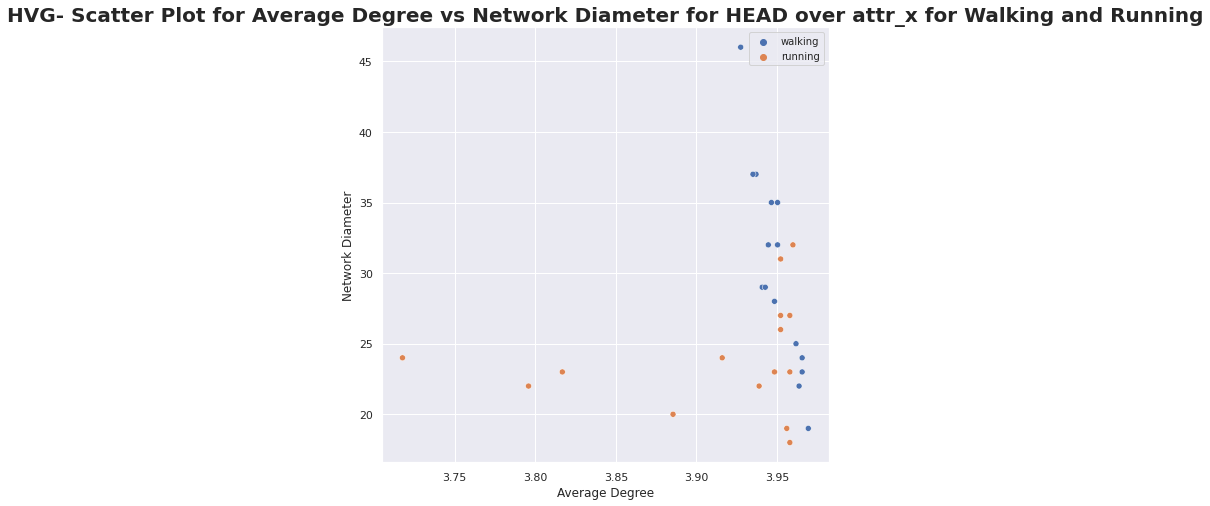

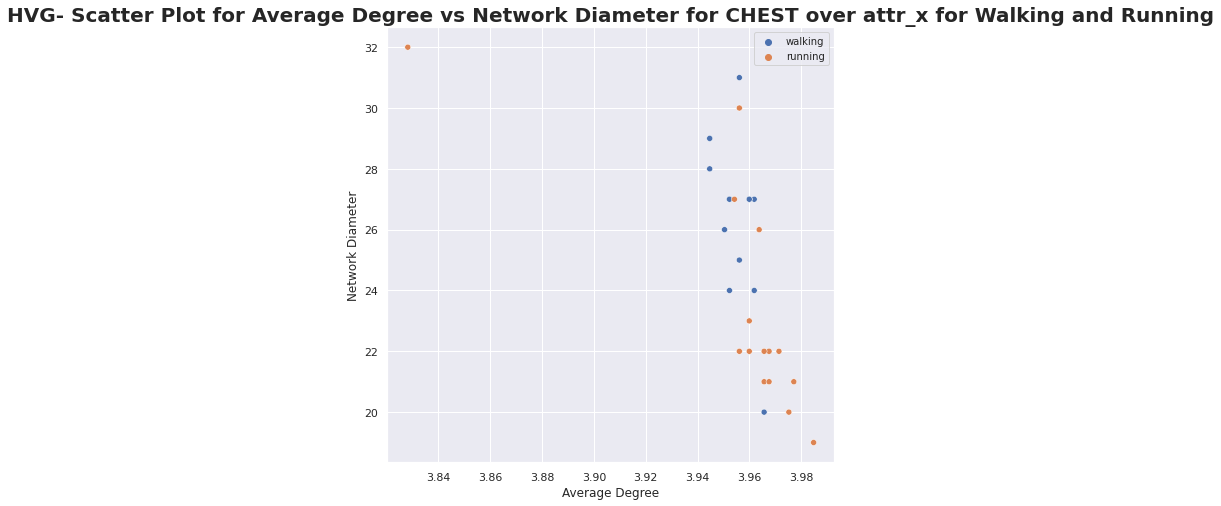

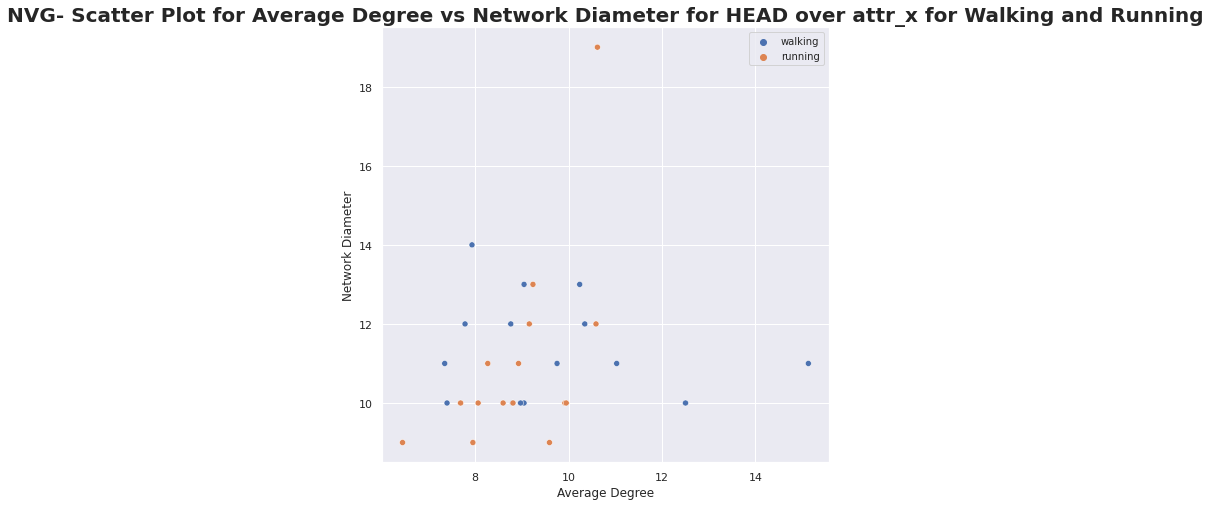

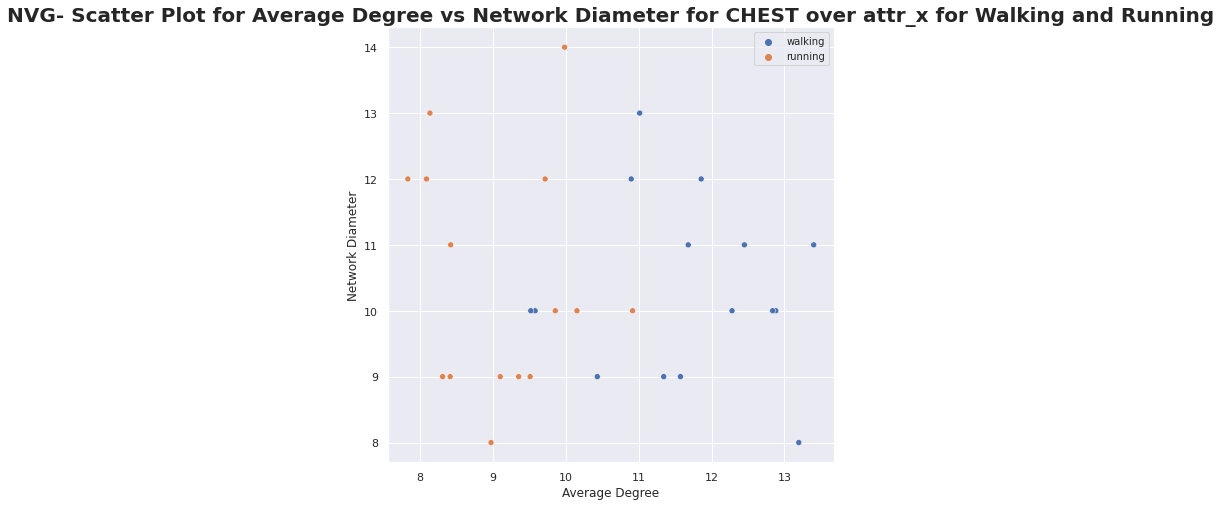

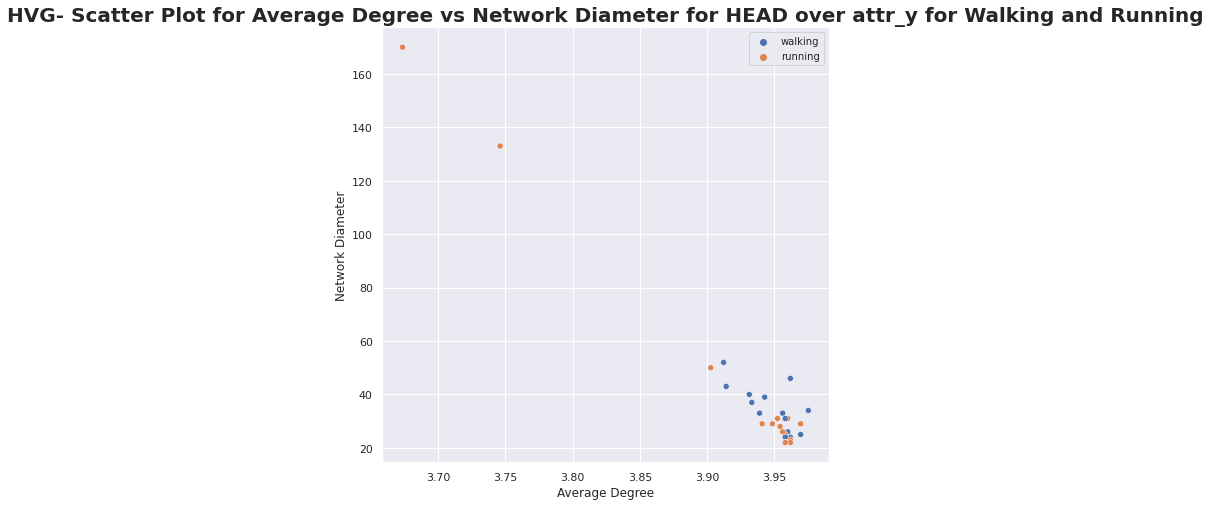

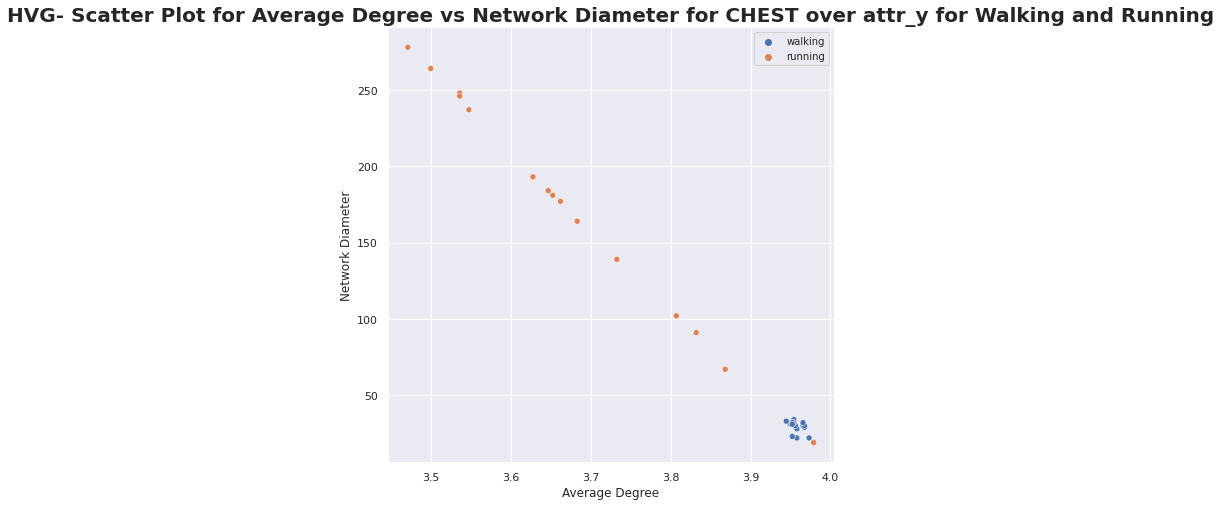

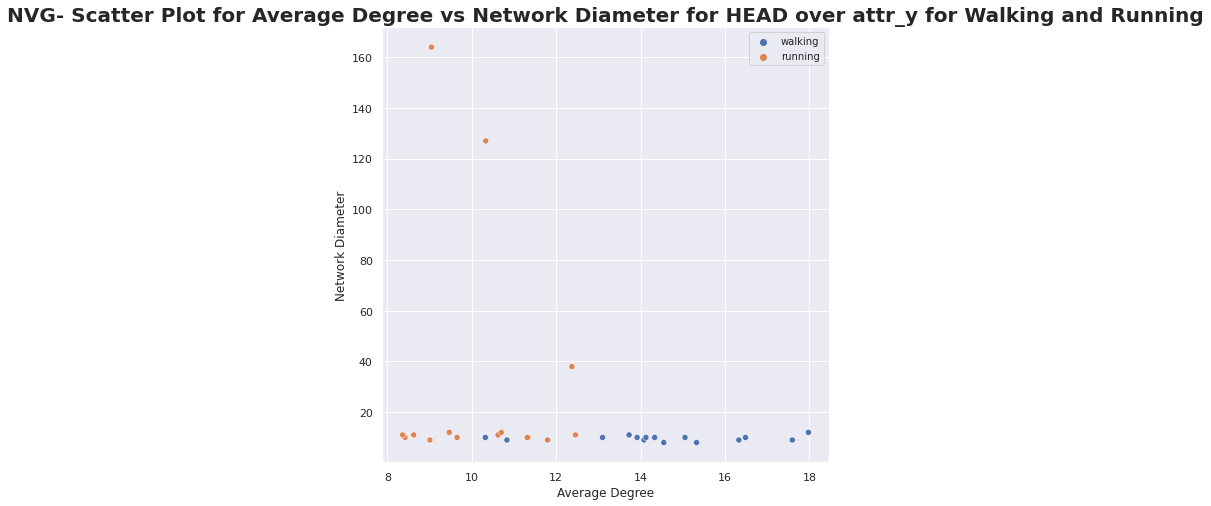

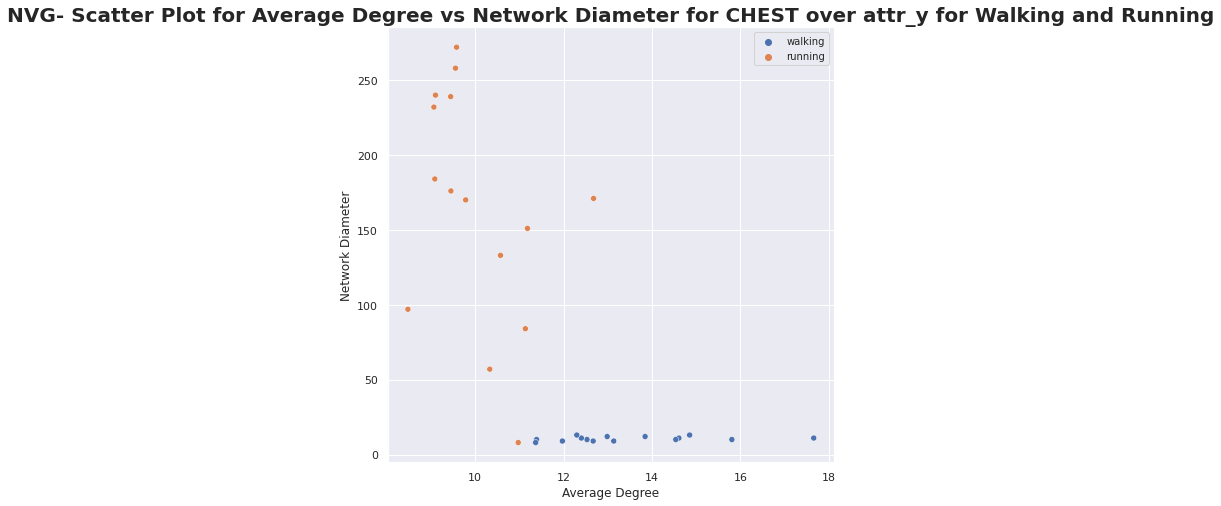

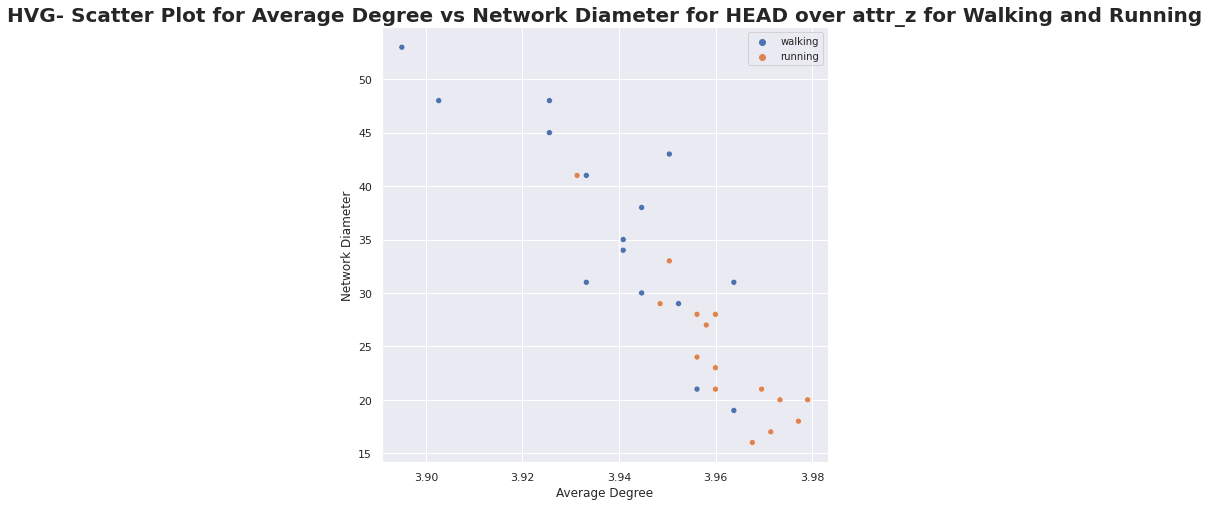

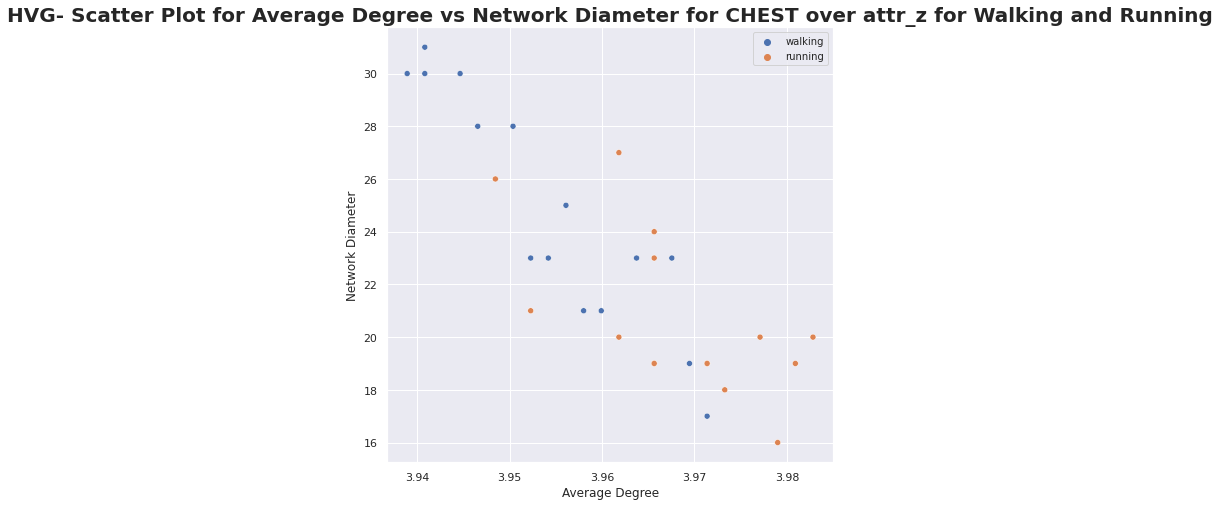

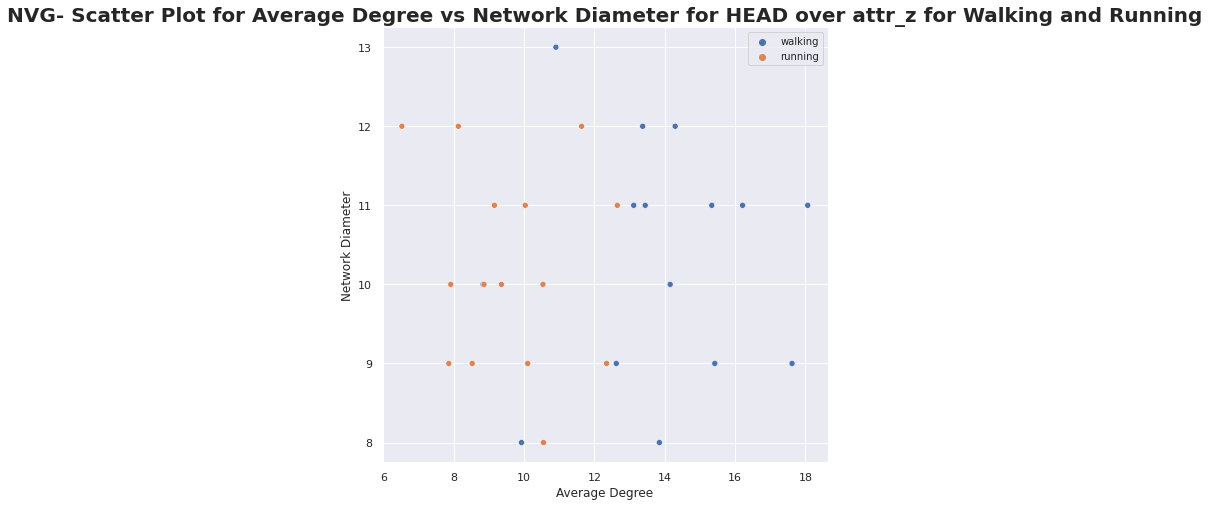

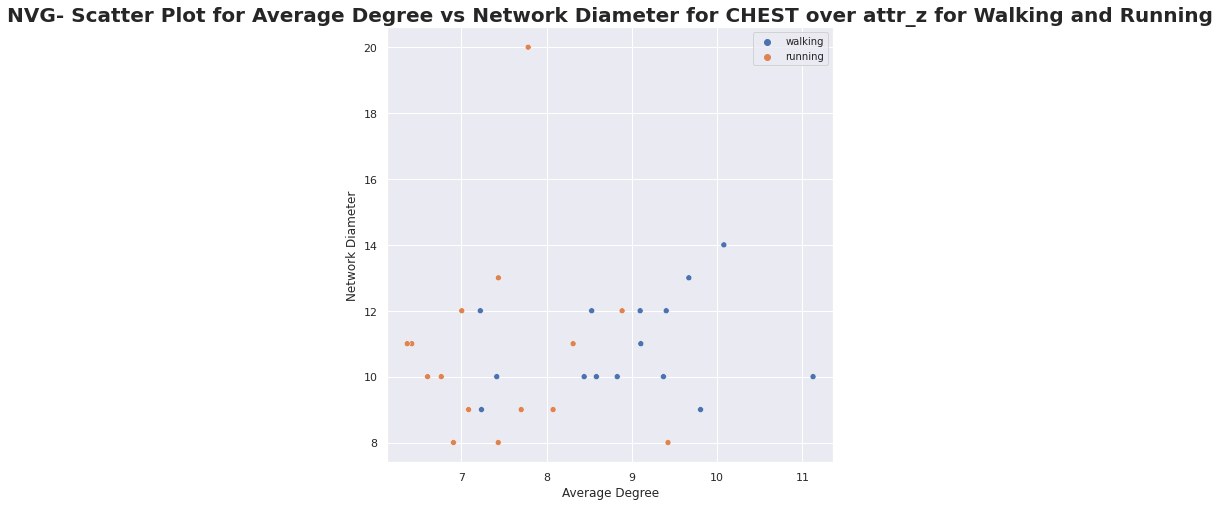

In [ ]:
sc(df,'walking','running') #calling of sc function, where three arguments are passed- data as df, activity 1 as walking and activity 2 as running

## **Q6**

## **Plotting NVG and HVG for Climbing Up and Climbing Down**

**Understanding** **the plotting of the graphs:**
The graphs are generated in such a way that first NVG is generated for Head at attribute X, then NVG is generated for Chest at attribute X.
Next, HVG is generated for Head at attribute X, then HVG is generated for Chest at attribute X.
In such a manner, two NVG followed by two HVG graphs are being generated and this is same for all other cases (based on attributes). Because in this segment, we are focusing on Climbing Up and Climbing Down, so there are total 12 graphs generated in this cell.
6 graphs are for NVG (3 attributes x 2 parts)
6 graphs are for HVG (3 attributes x 2 parts)

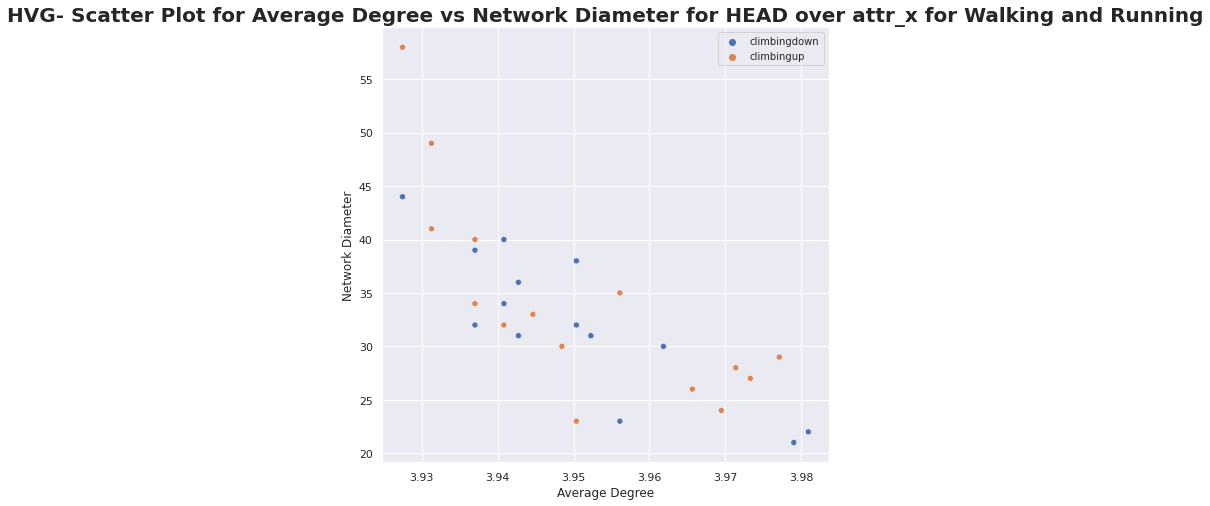

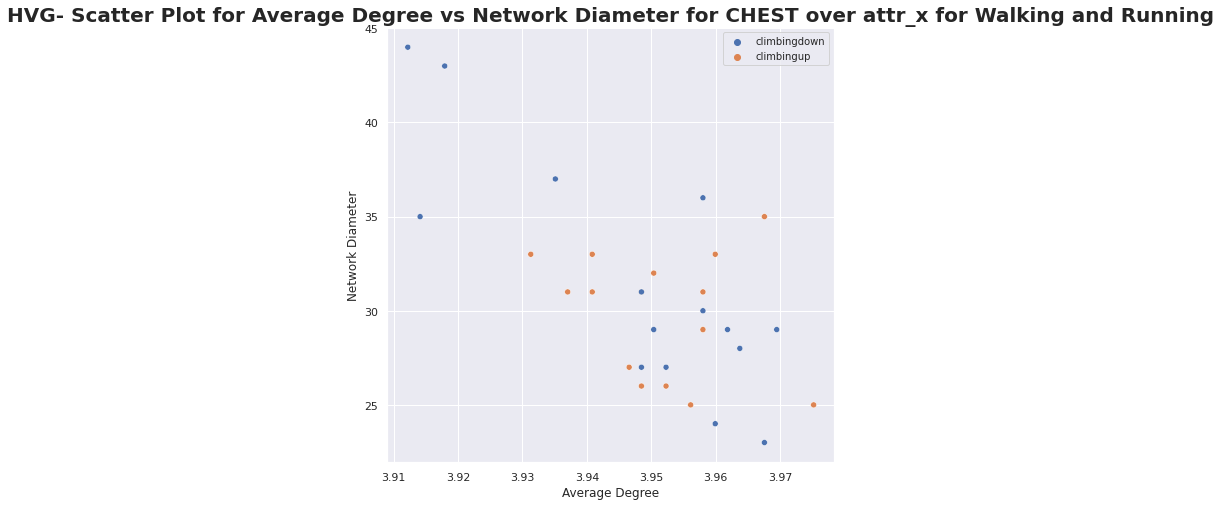

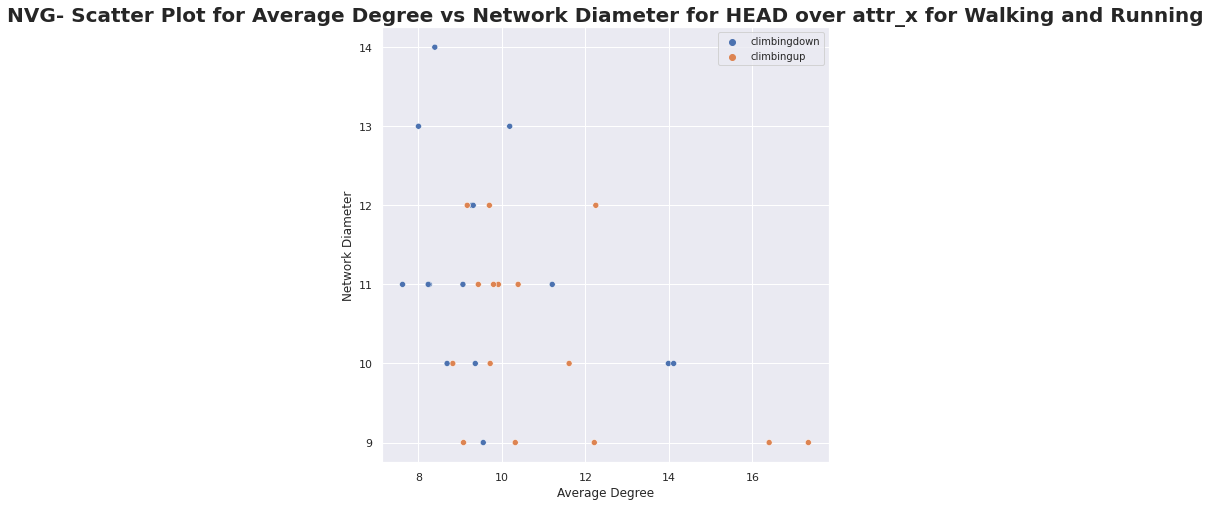

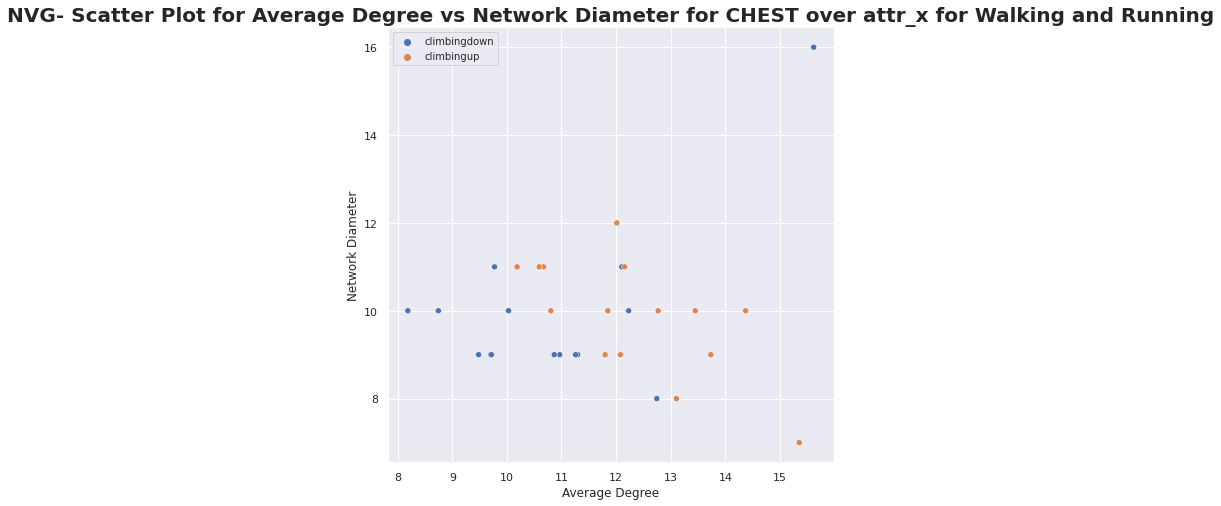

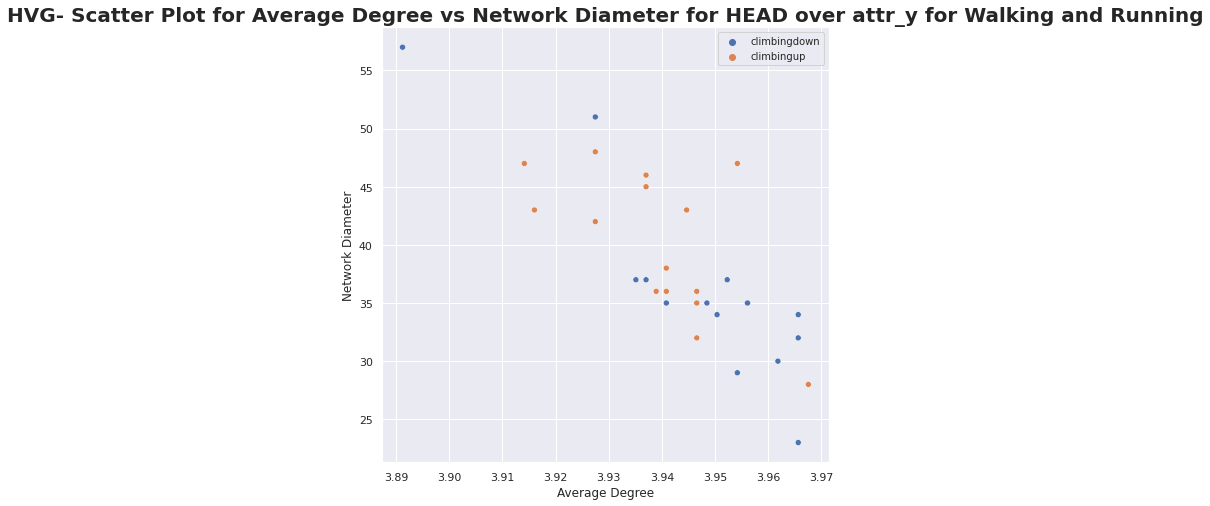

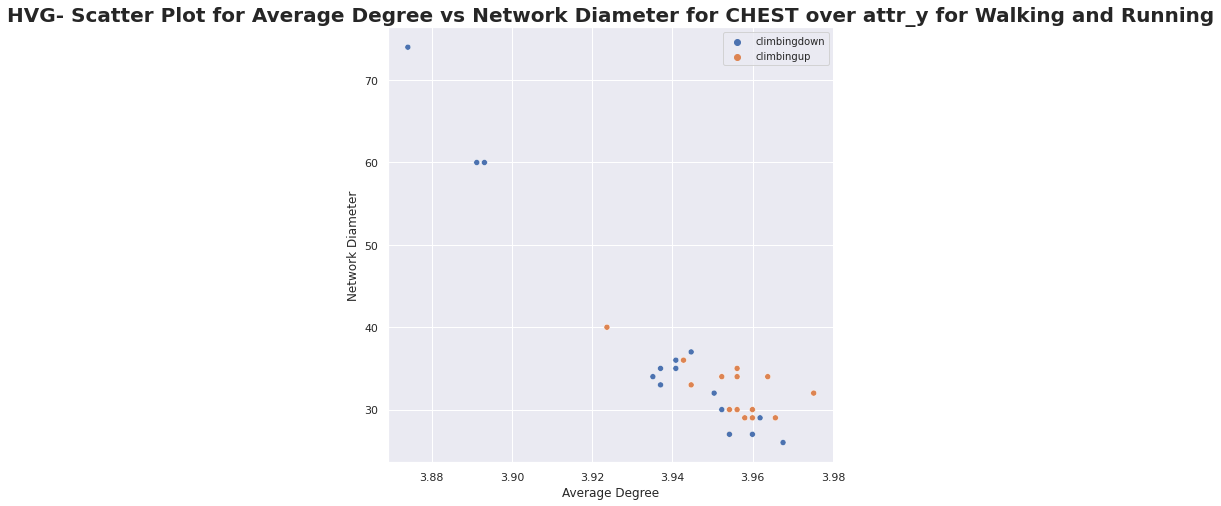

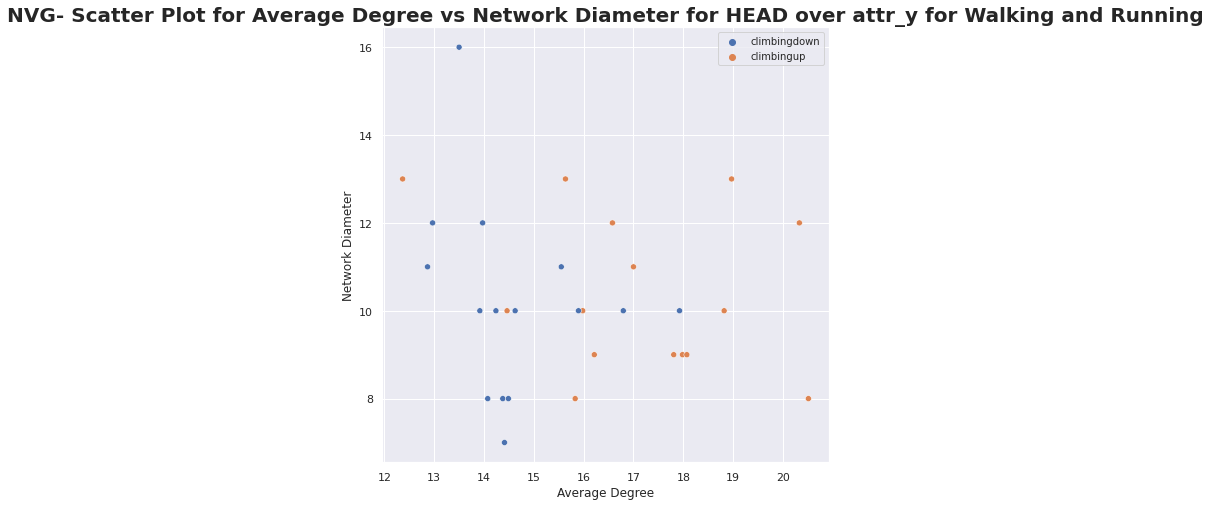

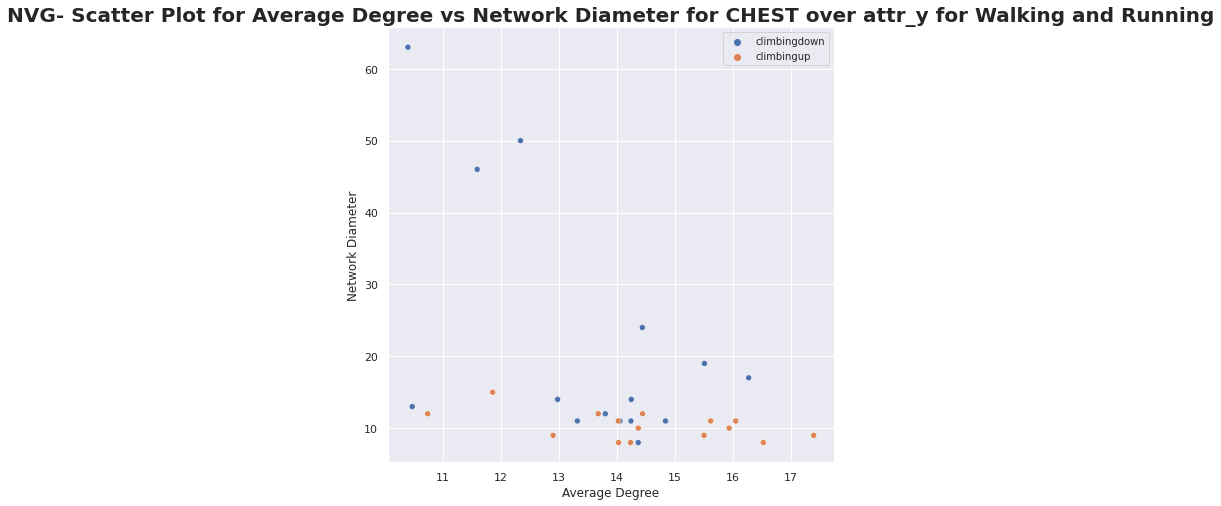

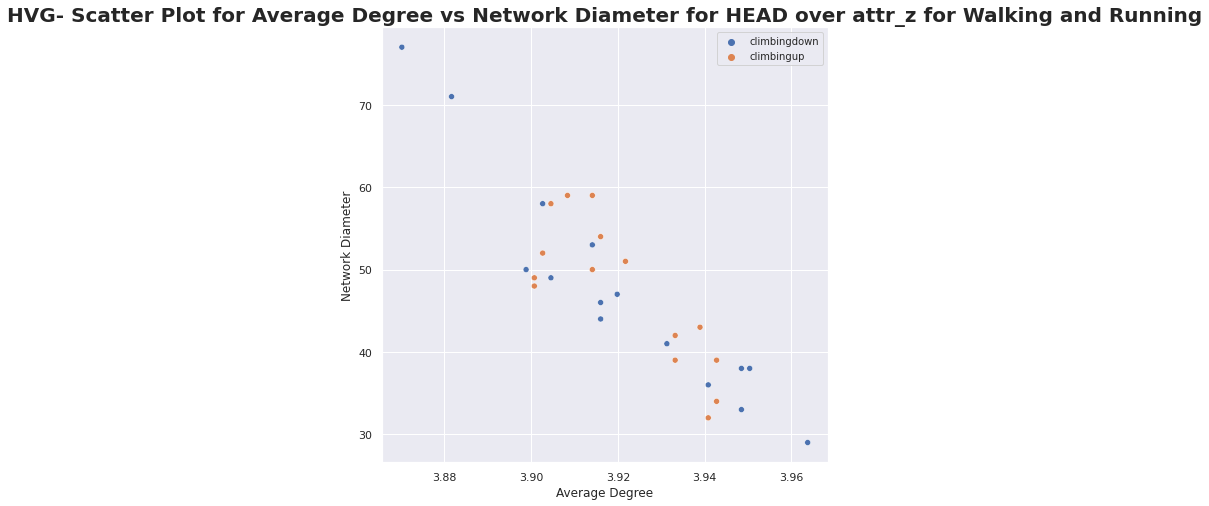

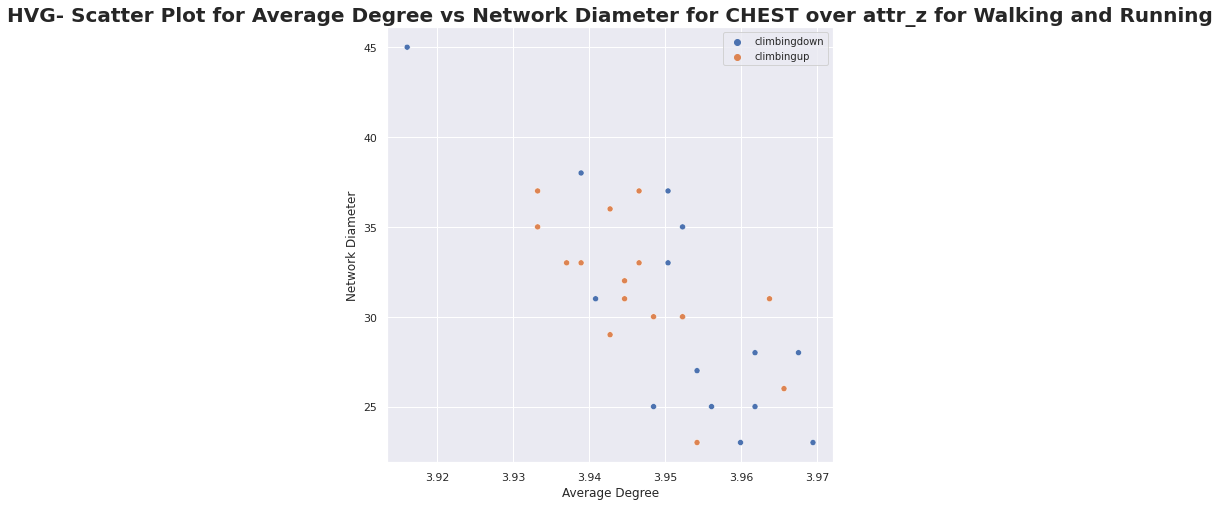

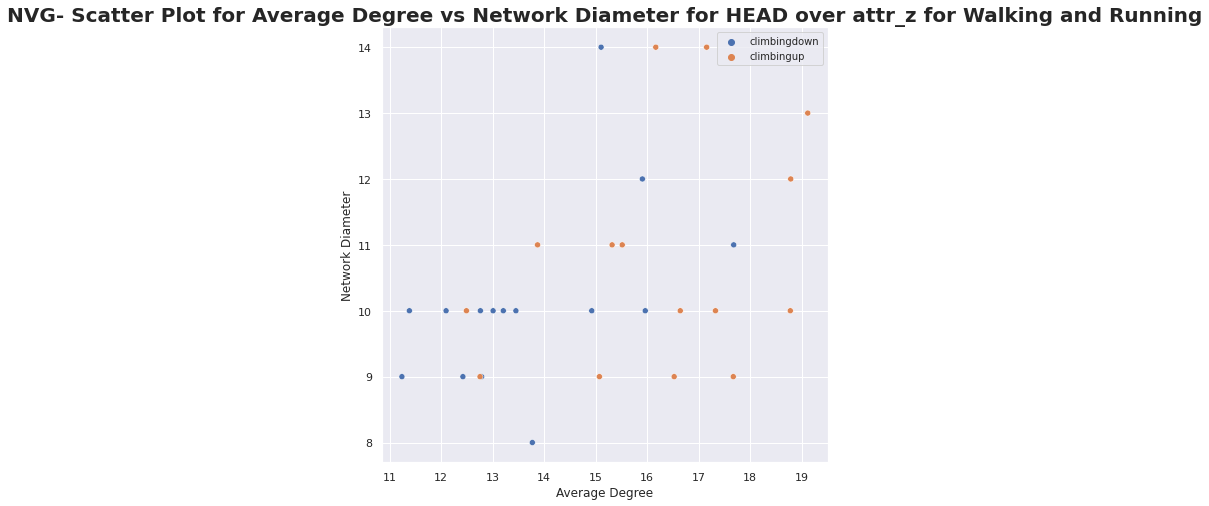

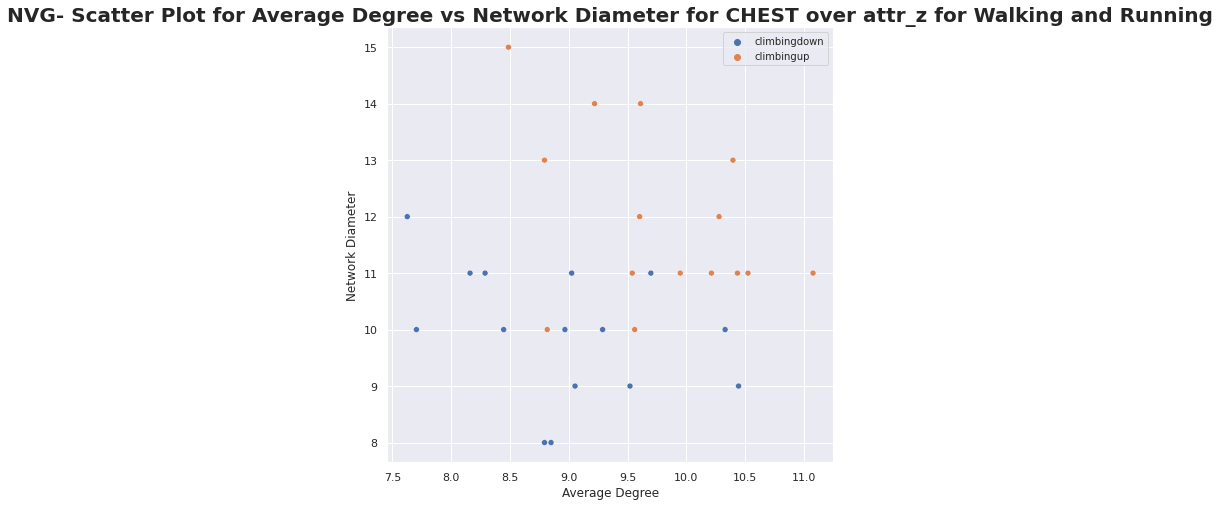

In [ ]:
sc(df,'climbingup','climbingdown') #calling of sc function, where three arguments are passed- data as df, activity 1 as walking and activity 2 as running

# **Task 2**

In [ ]:
import os #importing os
os.chdir("/content/drive/My Drive") #passing drive directory path to use the dataset from the drive to use all the subjects

In [ ]:
dir_path = '/content/drive/My Drive/Datasets' #directing the path of datasets to access the data
dir_files = os.listdir(dir_path)  #taking a new variable dir_files that holds the directory path dir_path

In [ ]:
import numpy as np #importing numpy as np
def s_entropy(freq_list): #defining a new function s_entropy which holds argument freq_list
    freq_list = [element for element in freq_list if element != 0] #taking a new variable freq_list which parses element in freq_list
    #however, it also checks for freq_list to not be equal to zero.
    sh_entropy = 0.0 #taking a new variable sh_entropy and assigning value of 0.0 to it.
    for freq in freq_list: #for loop to iterate freq in freq_list
        sh_entropy += freq * np.log(freq) #assigning freq * np.log(freq) increment to sh_entropy
    sh_entropy = -sh_entropy #sh_entropy = -sh_entropy
    return(sh_entropy) #returning sh_entropy

def ordinal_patterns(ts, embdim, embdelay): #defining a new function named ordinal_patterns which holds three different arguments:
  #ts
  #embdin
  #embdelay
    m= embdim #taking a new varible m and storing the value of embdim in it.
    t=embdelay #taking a new variable b and storing the value of embdelay in it.
    x = ts if isinstance(ts, np.ndarray) else np.array(ts) #new variable x to store ts if it is instance of ts and np.array
    #if the above is not validated, then return np.array that holds ts

    tmp = np.zeros((x.shape[0], m)) #new variable tmp to shape from 0.
    for i in range(m): #for loop to iterate i in m
        tmp[:, i] = np.roll(x, i*t)
    partition = tmp[(t*m-1):, :] #new variable partition to hold the computation: tmp[(t*m-1):, :]
    permutation = np.argsort(partition) #running np.argsort that passes the argument partition, discussed above, and assigning it to a new variable named permutation.
    idx = _hash(permutation) #new variable named idx that holds _hash having argument permutation, just discussed above.

    counts = np.zeros(np.math.factorial(m)) #np.zeros that holds factorial of m and is assigned to a new variabe named counts
    for i in range(counts.shape[0]): #for loop to iterate i in counts.shape[0]
        counts[i] = (idx == i).sum() #computing (idx == i).sum() and assigning it to the ith index of counts.
    return list(counts[counts != 0].astype(int)) #retur list that holds the counts not equal to 0 and type as int

def _hash(x): #creating/ defining a new named _hash that holds x
    m, n = x.shape #m=shape of x
    #n=shape of x
    if n == 1: #if condition to chrck whether n is equal to 1, and it true then
        return np.zeros(m) #returns the np.zeros holding m
    return np.sum(np.apply_along_axis(lambda y: y < x[:, 0], 0, x), axis=1) * np.math.factorial(n-1) + _hash(x[:, 1:])
    # returning the computation which holds and performs the following operation: np.apply_along_axis(lambda y: y < x[:, 0], 0, x), axis=1) * np.math.factorial(n-1) + _hash(x[:, 1:]

def p_entropy(op):#defining a new named p_entropy that holds op
    ordinal_pat = op #taking a new variable named ordinal_pat and assigning the value of op to it.
    max_entropy = np.log(len(ordinal_pat)) #new variable named max_entropy that holds np.log till length of ordinal_pat
    p = np.divide(np.array(ordinal_pat), float(sum(ordinal_pat))) #new variable p that holds the following computation: (np.array(ordinal_pat), float(sum(ordinal_pat)))
    return(s_entropy(p)/max_entropy) #returning s_entropy that holds p as an argument, and s_entropy is divided by max_entropy

def complexity(op): #defining a new named complexity that holds op
    pe = p_entropy(op) #new variable that holds the value of p_entropy that has op as an argument
    constant1 = (0.5+((1 - 0.5)/len(op)))* np.log(0.5+((1 - 0.5)/len(op))) #new variable named constant1 that performs the following computation: (0.5+((1 - 0.5)/len(op)))* np.log(0.5+((1 - 0.5)/len(op)))
    constant2 = ((1 - 0.5)/len(op))*np.log((1 - 0.5)/len(op))*(len(op) - 1) #new variable named constant2 that performs the following computation:((1 - 0.5)/len(op))*np.log((1 - 0.5)/len(op))*(len(op) - 1)
    constant3 = 0.5*np.log(len(op)) #new variable named constant3 that performs the following computation: 0.5*np.log(len(op))
    Q_o = -1/(constant1+constant2+constant3) #new variable named Q-o that performs the following computation: -1 divided by sum of all three variables defined above (constant1, constant2, constant3 )

    temp_op_prob = np.divide(op, sum(op)) #new variable temp_op_prob to divide op and sum of op
    temp_op_prob2 = (0.5*temp_op_prob)+(0.5*(1/len(op))) #new variable temp_op_prob2 to perform following computation: (0.5*temp_op_prob)+(0.5*(1/len(op)))
    JSdivergence = (s_entropy(temp_op_prob2) - 0.5 * s_entropy(temp_op_prob) - 0.5 * np.log(len(op))) #new variable JSdivergence
    Comp_JS = Q_o * JSdivergence * pe #new variable named Comp_JS that holds the multiplication of  Q_o, pe, and JSdivergence
    return(Comp_JS) #returning Comp_JS

def weighted_ordinal_patterns(ts, embdim, embdelay): #defining a new function named weighted_ordinal_patterns that holds three arguments- ts, embdim, and embdelay
    m= embdim #new variable named m to store embdim
    t= embdelay #new variable t to store embdelay
    x = ts if isinstance(ts, np.ndarray) else np.array(ts) #new variable x

    tmp = np.zeros((x.shape[0], m)) #new variable tmp to store np.zeros((x.shape[0], m))
    for i in range(m):  #for i in range m
        tmp[:, i] = np.roll(x, i*t) #manipulation of variable tmp
    partition = tmp[(t*m-1):, :] #partition to store tmp[(t*m-1):, :]
    xm = np.mean(partition, axis=1) #mean of partition and assigning it to a new variable xm
    weight = np.mean((partition - xm[:, None])**2, axis=1) #new variable weight to compute the following computation: np.mean((partition - xm[:, None])**2)
    permutation = np.argsort(partition) #assigning np.argsort(partition) to variable permutation
    idx = _hash(permutation) #passing _hash(permutation) and assigning it to variable named idx
    counts = np.zeros(np.math.factorial(m)) #count variable to hold np.zeros(np.math.factorial(m))
    for i in range(counts.shape[0]): #iterating i in range of counts of shape
        counts[i] = sum(weight[i == idx])

    return list(counts[counts != 0])  #return list of counts not equal to 0.

**Q2**-**a**

In [ ]:
df2 = pd.DataFrame(columns=['Subject','Acc_Axis','Signal_Length','Dimensions','Delay','Permutation_Entropy','Complexity','Body Part','Activity']) #creating a new dataframe to store different parameters
acty = ['climbingup','climbingdown','running','walking'] #storing activities- 'climbingup','climbingdown','running','walking'
bdy_pt = ['head','chest'] #storing body parts- head and chest


axis = list("xyz") #labeling axis to store in a variable axis.
signals = [1024, 2048, 4096] #selecting the desired signals 1024, 2048, 4096
dimensions = [3, 4, 5, 6] #defining the dimesnions
delays = [1, 2, 3] #defining the delays


for activity in acty: #for loop for activity based on acty
  for sub_name in range(0,15): #for loop iteration for sub_name from 0 to 15 (for all 15 subjects)
      for body in bdy_pt: #for loop to iterate for body parts head and chest.
        test = ('/acc_' + activity + '_csv' + f' ({sub_name})') #taking a new variable test and considering all the datasets of the 15 subjects.
        #here /acc refers to the beginning of the datasets, because for every subject, the data stored in the drive  has a nomenclature beginning with acc for every activity and body parts.
        #Rather than to rename each dataset separately with a unique name, rather the best approach is to use a for loop that works in order based on subject.
        #Additionally, it is separated by the activity type followed by .csv extension.
        read_me = pd.read_csv(dir_path + test + '/acc_' + activity + f'_{body}' + '.csv') #reading all csv
        for i in axis: #for loop to iterate i in axis
          for j in signals: #for loop to iterate j in signals
            for k in dimensions: #for loop to iterate k in dimensions
              for l in delays:#for loop to iterate l in delays
                op = ordinal_patterns(read_me['attr_'+i][1000:j], k, l) #new variable named op to perform the computation: (read_me['attr_'+i][1000:j], k, l) of ordinal_patterns
                res = [int(sub_name)+1, i.upper(), j, k, l, p_entropy(op), complexity(op), body, activity]
                d = dict(zip(['Subject','Acc_Axis','Signal_Length','Dimensions','Delay','Permutation_Entropy','Complexity','Body Part','Activity'], res)) #selecting parameters for operation
                df2 = df2.append(d, ignore_index=True) #appending in the dataframe df2

In [ ]:
df2.index+=1
df2 #printing df2

,Subject,Acc_Axis,Signal_Length,Dimensions,Delay,Permutation_Entropy,Complexity,Body Part,Activity
1,1,X,1024,3,1,0.848680,0.128202,head,climbingup
2,1,X,1024,3,2,0.877461,0.105074,head,climbingup
3,1,X,1024,3,3,0.860593,0.112465,head,climbingup
4,1,X,1024,4,1,0.924833,0.072975,head,climbingup
5,1,X,1024,4,2,0.890299,0.093269,head,climbingup
...,...,...,...,...,...,...,...,...,...
12956,15,Z,4096,5,2,0.856516,0.207638,chest,walking
12957,15,Z,4096,5,3,0.897235,0.167600,chest,walking
12958,15,Z,4096,6,1,0.779405,0.275825,chest,walking
12959,15,Z,4096,6,2,0.884392,0.200662,chest,walking


**Q2**-**b**

In [ ]:
df3 = pd.DataFrame(columns=['Subject','Acc_Axis','Signal_Length','Dimensions','Delay','Permutation_Entropy','Complexity','Body Part','Activity']) #creating a new dataframe to store different parameters
acty = ['climbingup','climbingdown','running','walking'] #storing activities- 'climbingup','climbingdown','running','walking'
bdy_pt = ['head','chest'] #storing body parts- head and chest


axis = list("xyz") #labeling axis to store in a variable axis.
signals = [4096] #selecting the desired signals
dimensions = [3, 4, 5, 6] #defining the dimesnions
delays = [1] #defining the delays


for activity in acty: #for loop for activity based on acty
  for sub_name in range(0,15): #for loop iteration for sub_name from 0 to 15 (for all 15 subjects)
      for body in bdy_pt: #for loop to iterate for body parts head and chest.
        test = ('/acc_' + activity + '_csv' + f' ({sub_name})') #taking a new variable test and considering all the datasets of the 15 subjects.
        #here /acc refers to the beginning of the datasets, because for every subject, the data stored in the drive  has a nomenclature beginning with acc for every activity and body parts.
        #Rather than to rename each dataset separately with a unique name, rather the best approach is to use a for loop that works in order based on subject.
        #Additionally, it is separated by the activity type followed by .csv extension.
        read_me = pd.read_csv(dir_path + test + '/acc_' + activity + f'_{body}' + '.csv') #reading all csv
        for i in axis: #for loop to iterate i in axis
          for j in signals: #for loop to iterate j in signals
            for k in dimensions:  #for loop to iterate k in dimensions
              for l in delays: #for loop to iterate l in delays
                op = ordinal_patterns(read_me['attr_'+i][1000:j], k, l) #new variable named op to perform the computation: (read_me['attr_'+i][1000:j], k, l) of ordinal_patterns
                res = [int(sub_name)+1, i.upper(), j, k, l, p_entropy(op), complexity(op), body, activity]
                d = dict(zip(['Subject','Acc_Axis','Signal_Length','Dimensions','Delay','Permutation_Entropy','Complexity','Body Part','Activity'], res))
                df3 = df3.append(d, ignore_index=True) #appending d, ignore_index in the dataframe df3

In [ ]:
df3.index+=1 #beginning the index from 1
df3 #printing df3


,Subject,Acc_Axis,Signal_Length,Dimensions,Delay,Permutation_Entropy,Complexity,Body Part,Activity
1,1,X,4096,3,1,0.807992,0.147852,head,climbingup
2,1,X,4096,4,1,0.739336,0.219454,head,climbingup
3,1,X,4096,5,1,0.717453,0.270617,head,climbingup
4,1,X,4096,6,1,0.747196,0.274400,head,climbingup
5,1,Y,4096,3,1,0.787327,0.162602,head,climbingup
...,...,...,...,...,...,...,...,...,...
1436,15,Y,4096,6,1,0.695884,0.306886,chest,walking
1437,15,Z,4096,3,1,0.829509,0.138058,chest,walking
1438,15,Z,4096,4,1,0.758832,0.217676,chest,walking
1439,15,Z,4096,5,1,0.739604,0.275078,chest,walking


In [ ]:
unique_axis = df2['Acc_Axis'].unique() #new variable unique_axis to store axis from the df2.
unique_part = df2['Body Part'].unique() #new variable unique_part to store Body Parts from the df2.

In [ ]:
import seaborn as sns #importing seaborn as sns for plotting the scatter plots
import matplotlib.pyplot as plt #importing the matplotlib for title and figure understanding
def sc2(df,actx,acty): #defining a custom function named sc2 which holds df, actx, and acty.
  dim = [3,4,5,6] #target dimensions being justified
  for i in unique_axis: #for loop to iterate i in unique_axis
    for j in unique_part: #for loop to iterate j in unique_part
      for k in dim: #for loop to iterate k in dim (dimensions)
        df_filetered3 = df[(df['Acc_Axis'] == i) & (df['Body Part']== j) & (df['Dimensions']==k)] #new variable df_filetered3 which checks and stores for Acc_Axis of df is equal to i, Body Part of df is equal to j, and Dimensions of df is equal to k
        df_filtered4 = df_filetered3[(df_filetered3['Activity'].isin([actx,acty]))& (df_filetered3['Signal_Length'] == 4096) & (df_filetered3['Delay'] == 1)] #new variable to store computation for df_filtered3
        sns.scatterplot(data=df_filtered4,x='Permutation_Entropy',y='Complexity',hue='Activity') #generating scatter plots, where data is df, x holds Permutation_Entropy, y holds Complexity and hue is Activity basis.
        sns.set(rc={'figure.figsize':(8,8)}) #setting of the figure size.
        plt.title("Scatter Plot for Permutation Entropy and Complexity on "+ i + ', ' + 'for Body part: ' + j.upper() + ', for ' + actx + ' and ' + acty + f', and Dimension: {k}' ,fontweight="bold",fontsize=20)
       #giving title name, passing body part, passing activity, and dimensions.
       #also, setting the font size and weight
        plt.legend() #plt.legend
        plt.show()  #displaying the graphs

**Q3**

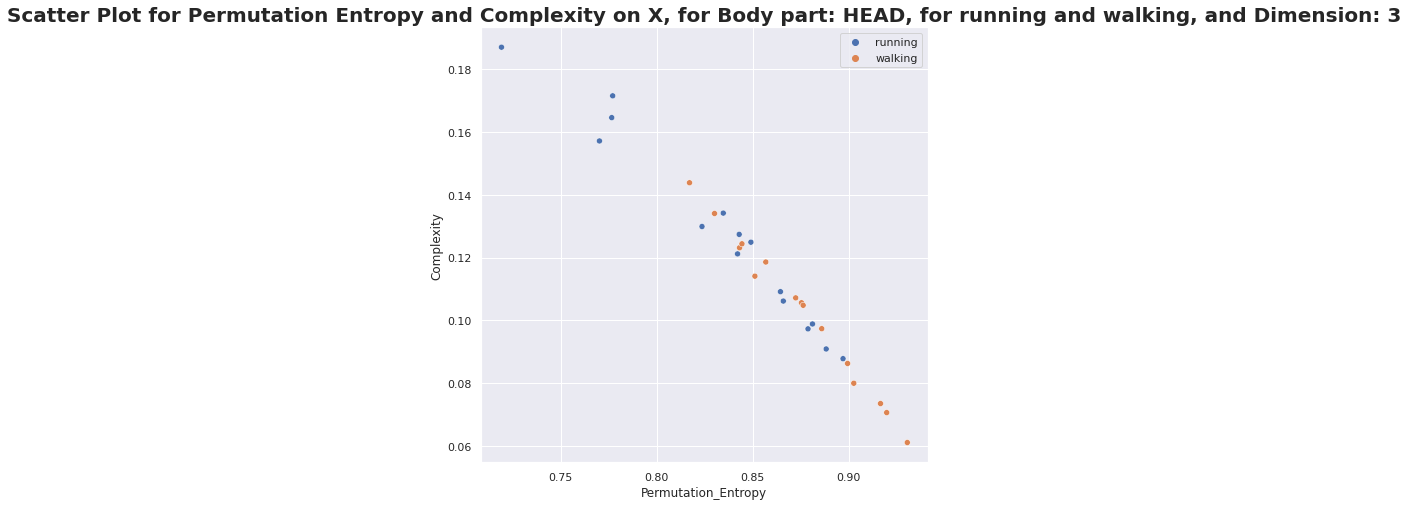

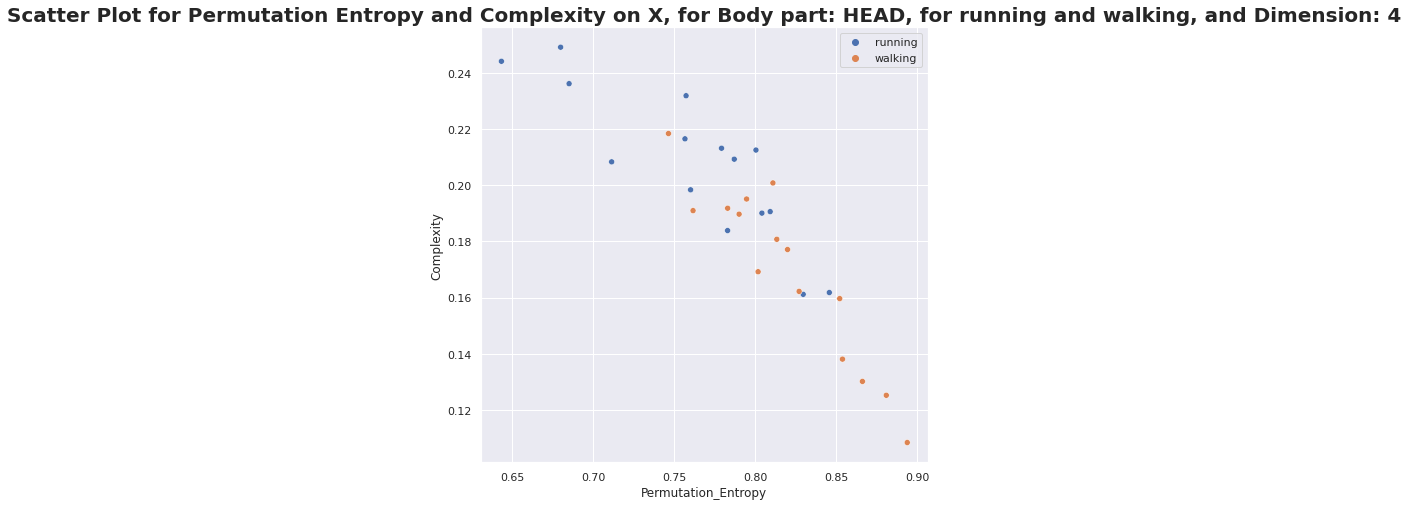

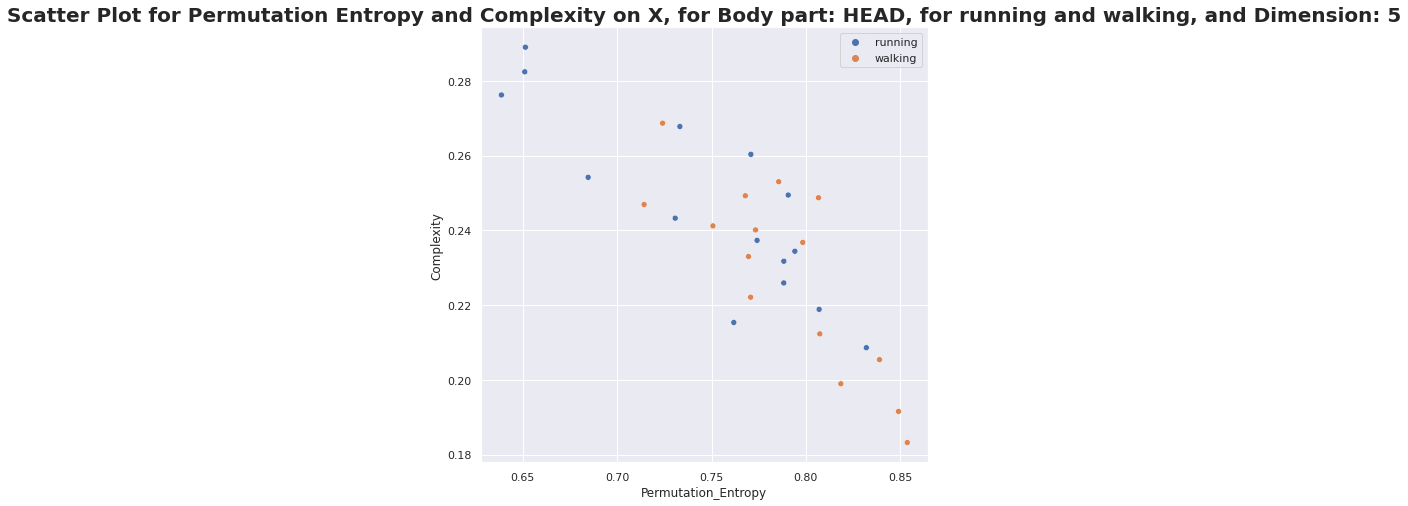

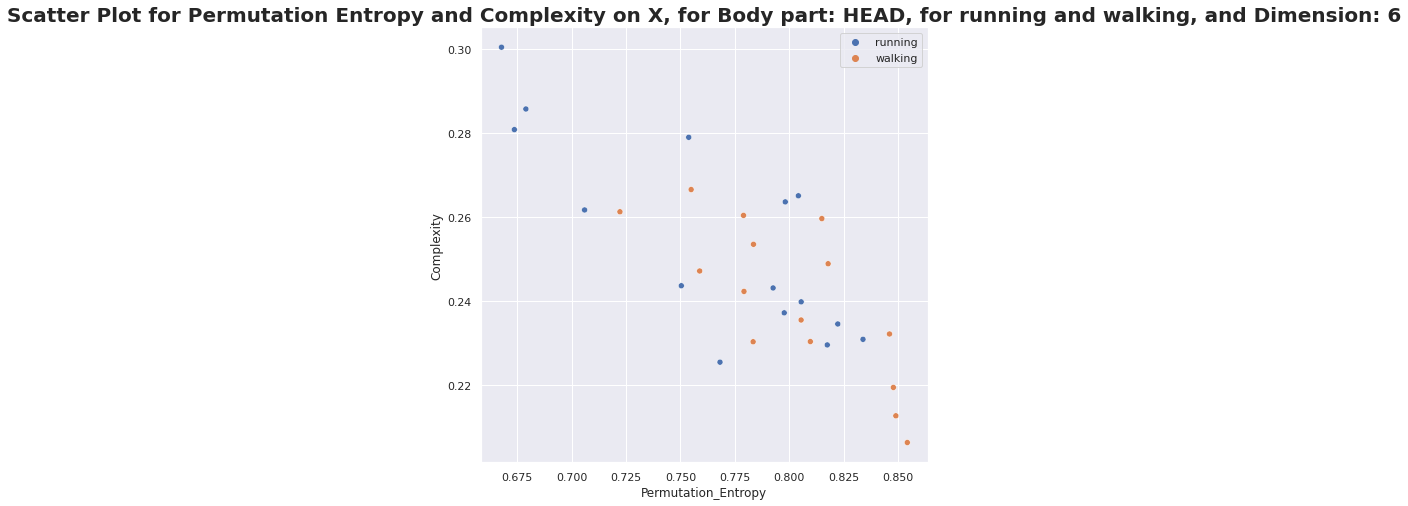

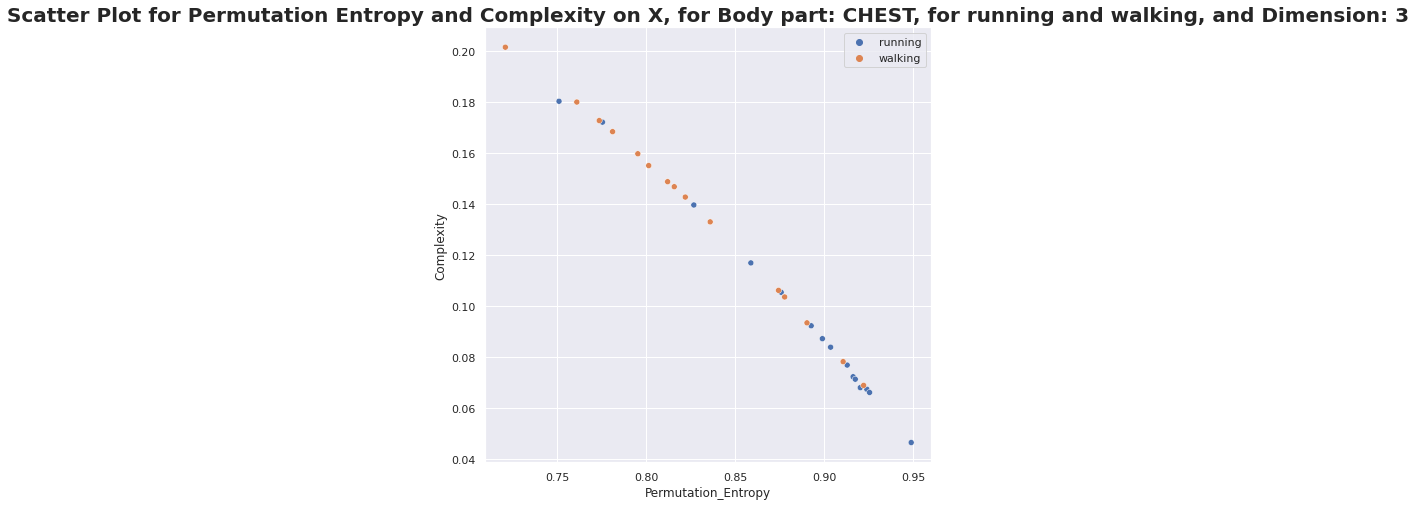

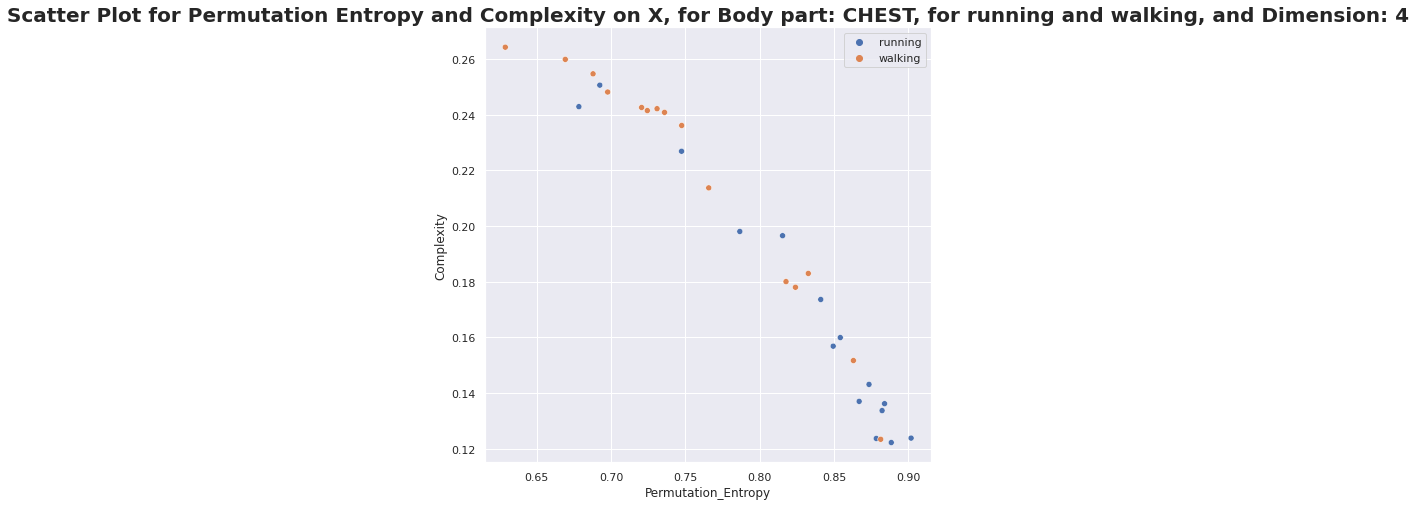

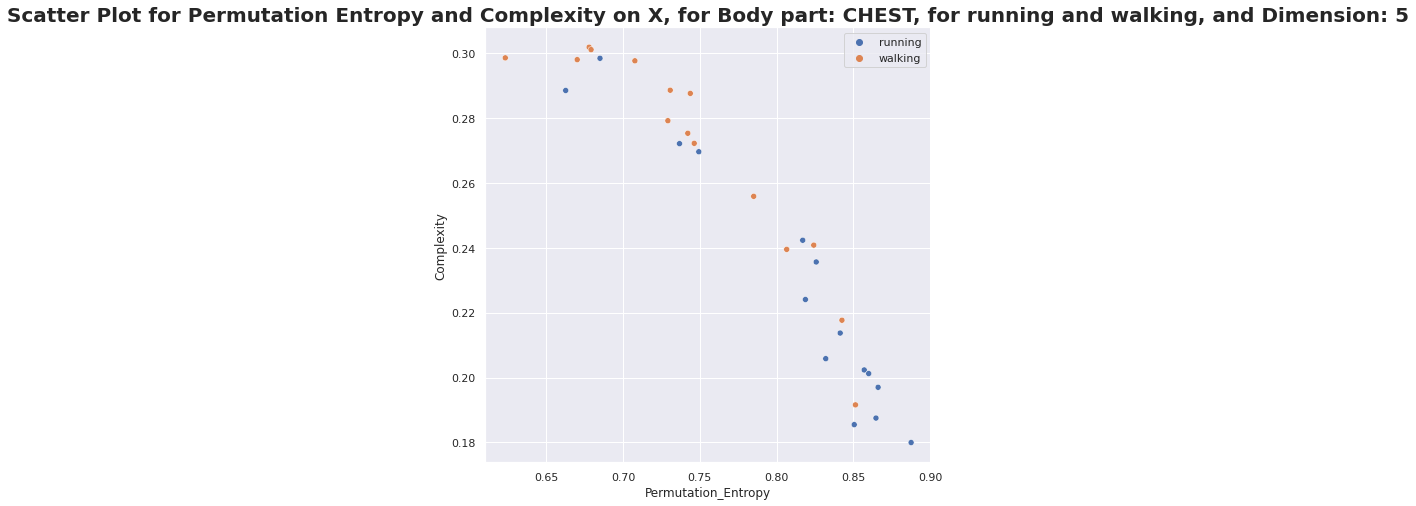

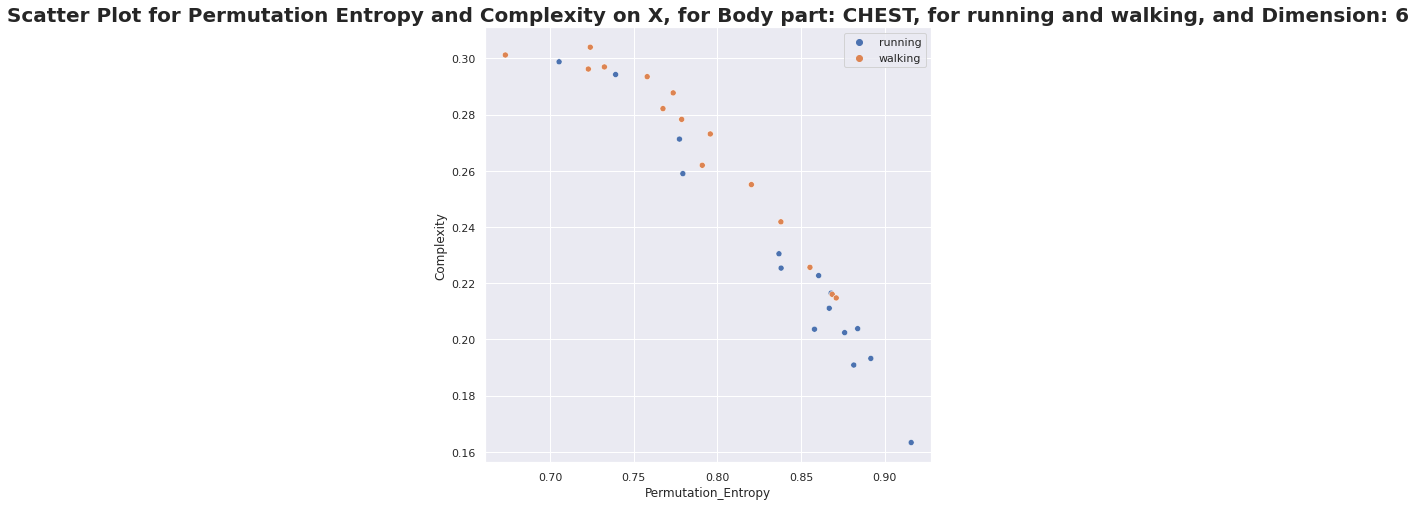

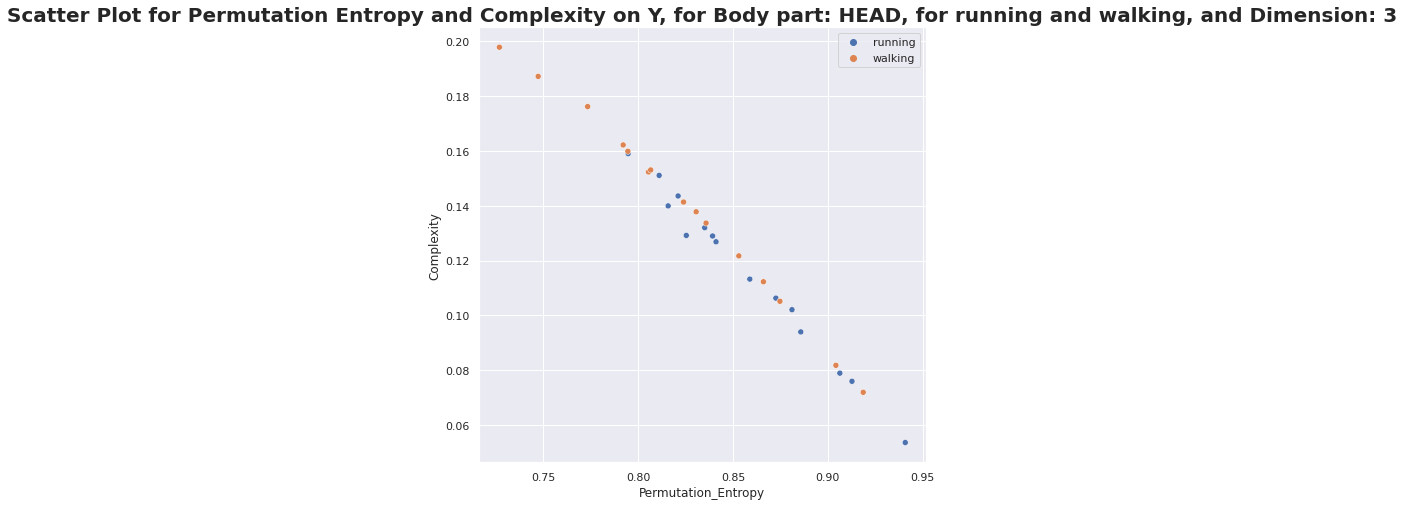

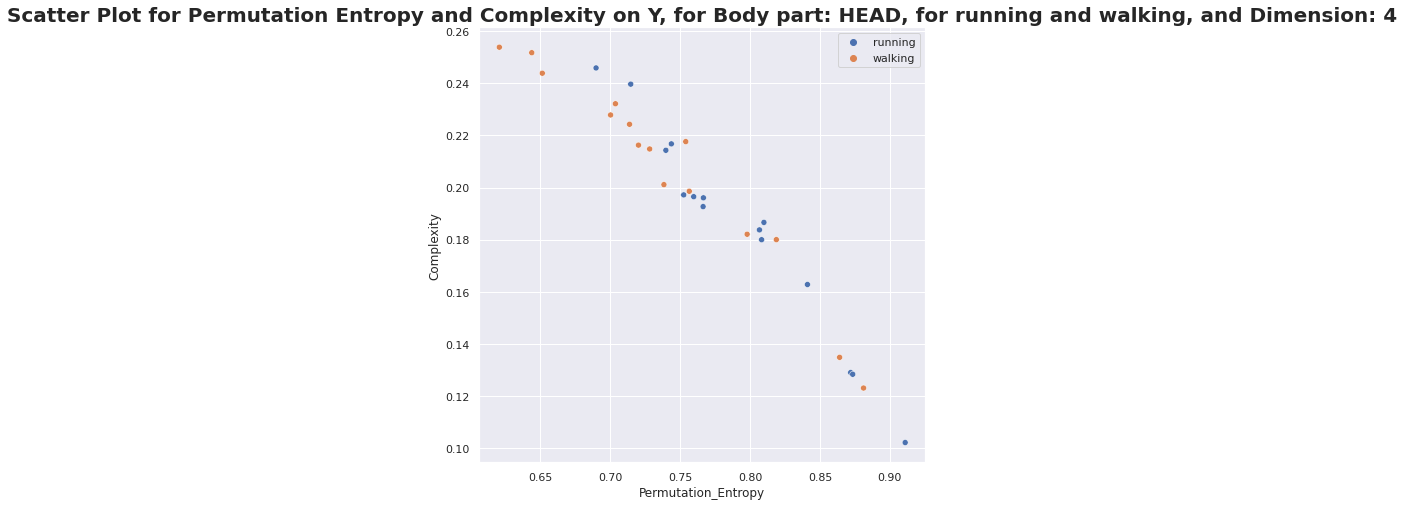

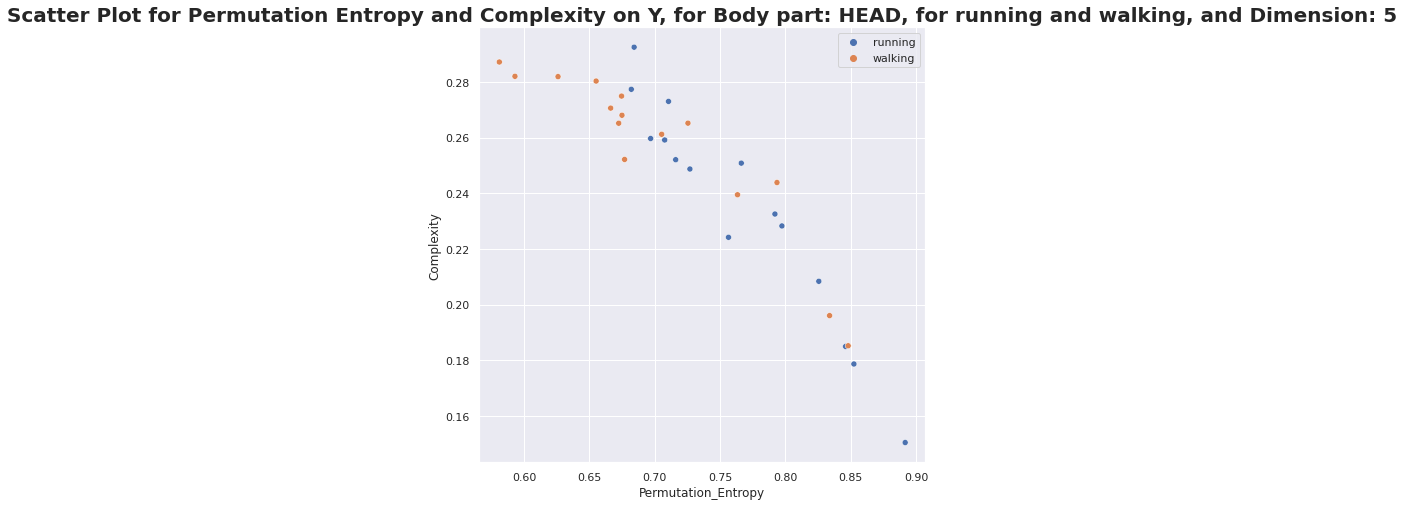

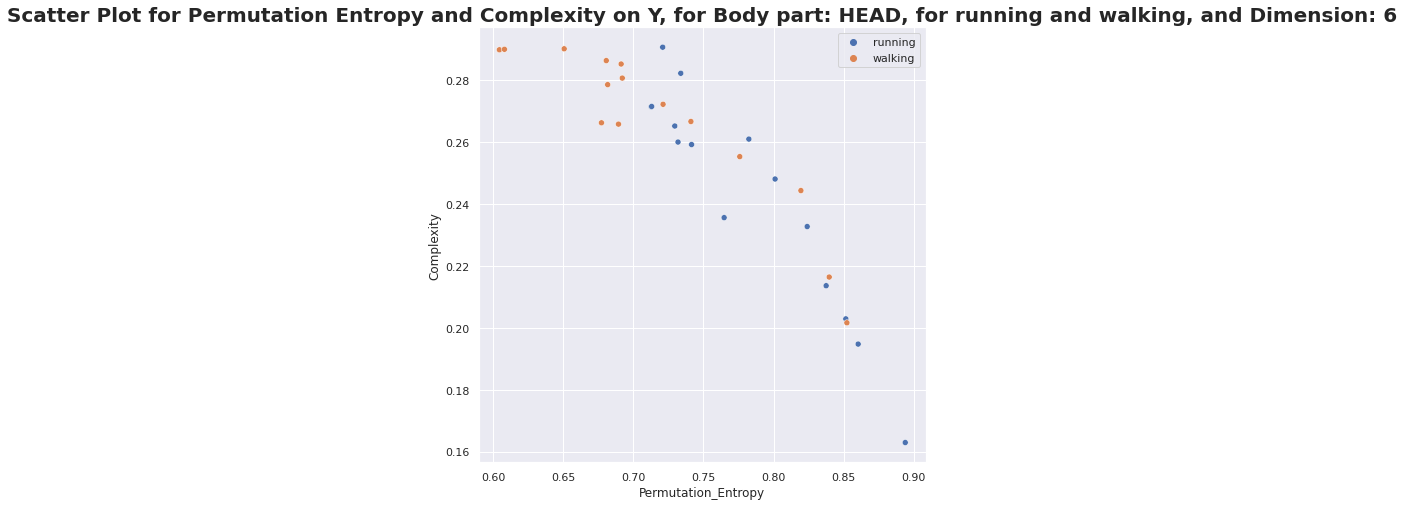

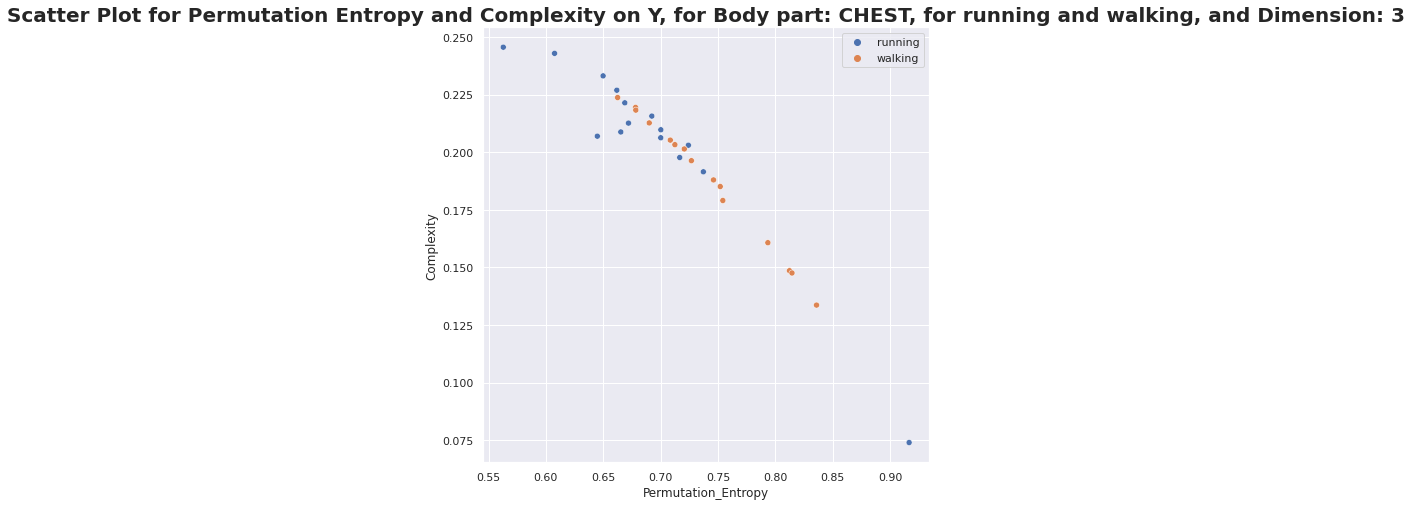

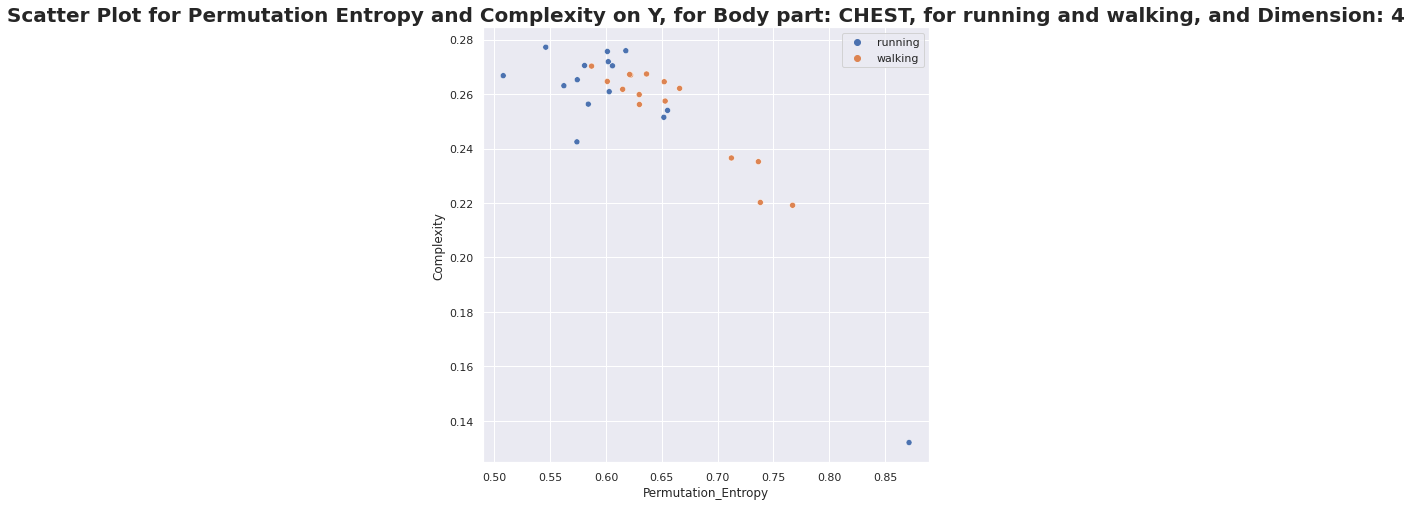

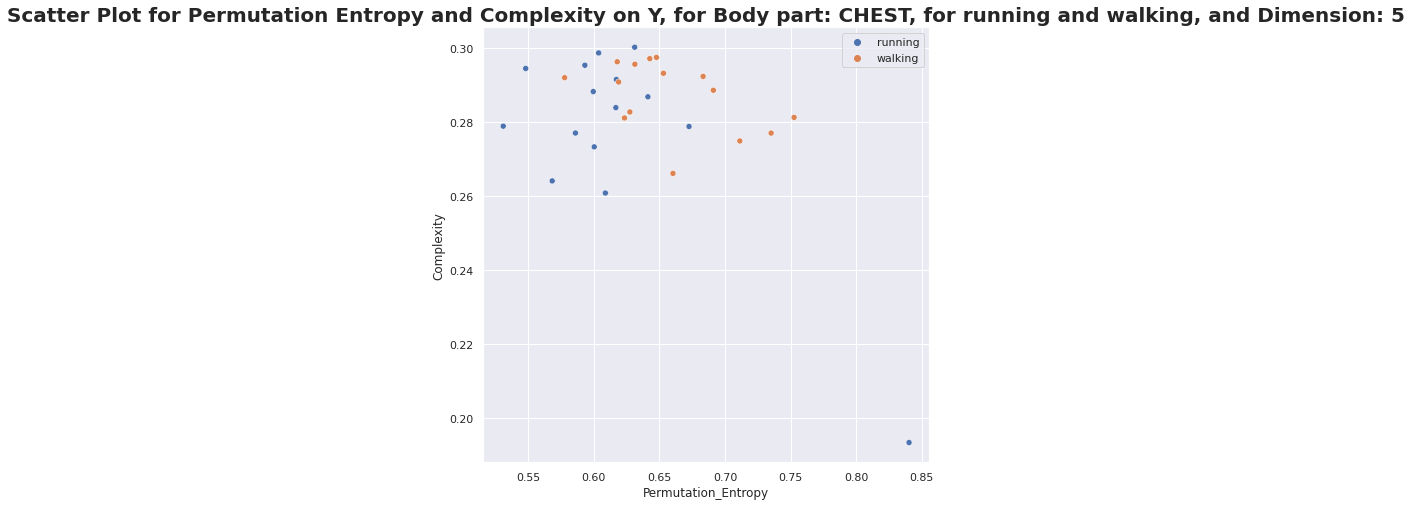

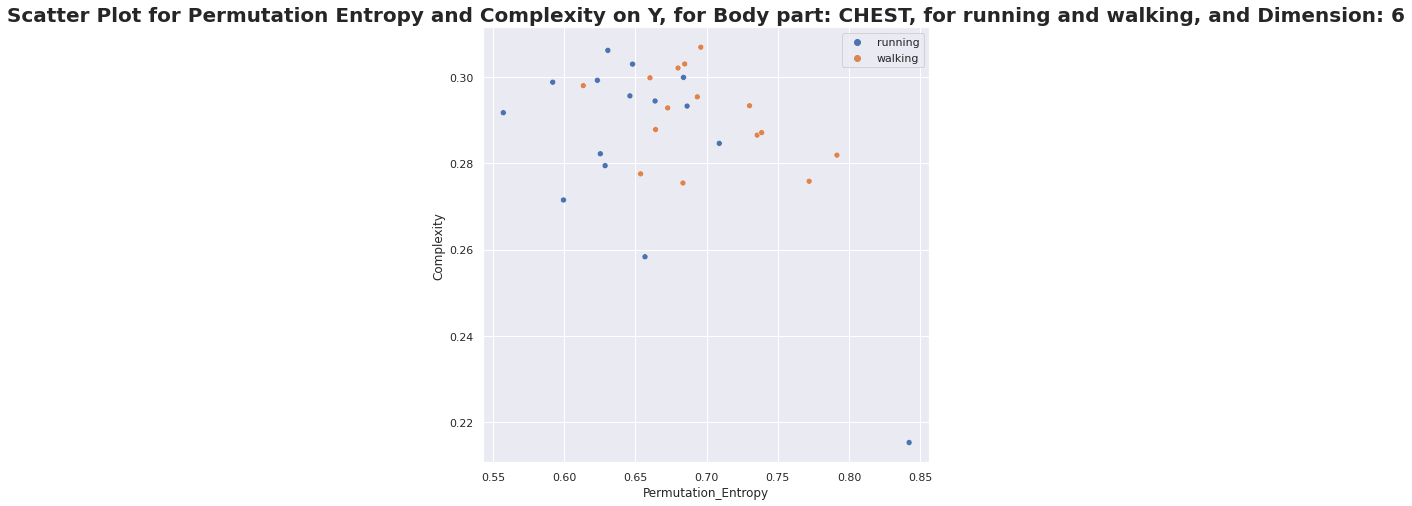

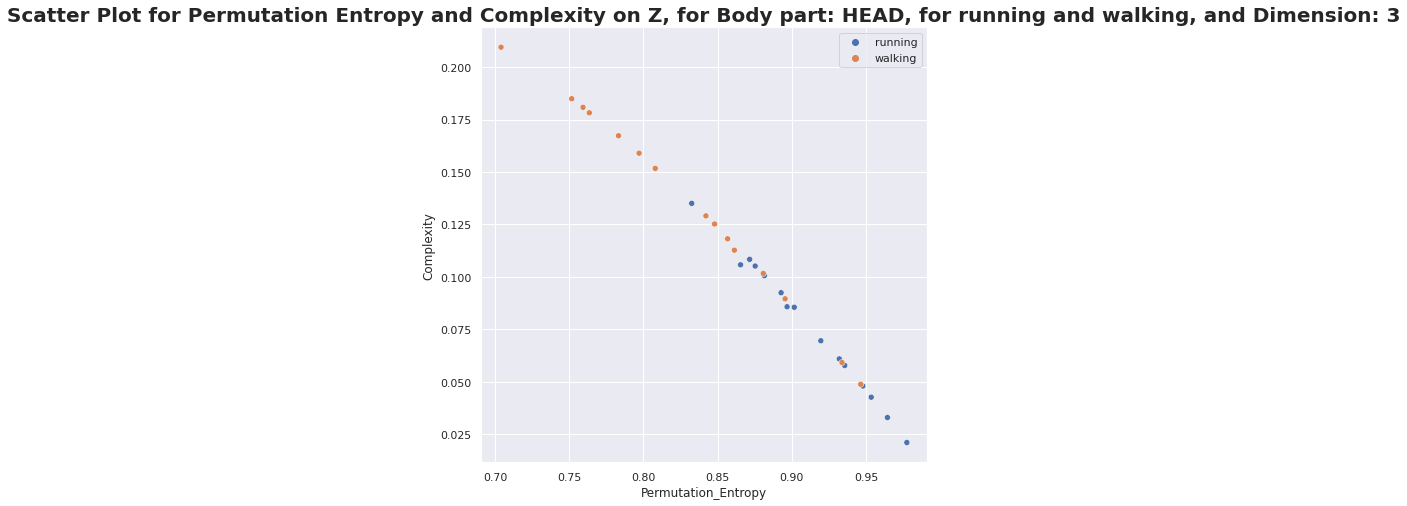

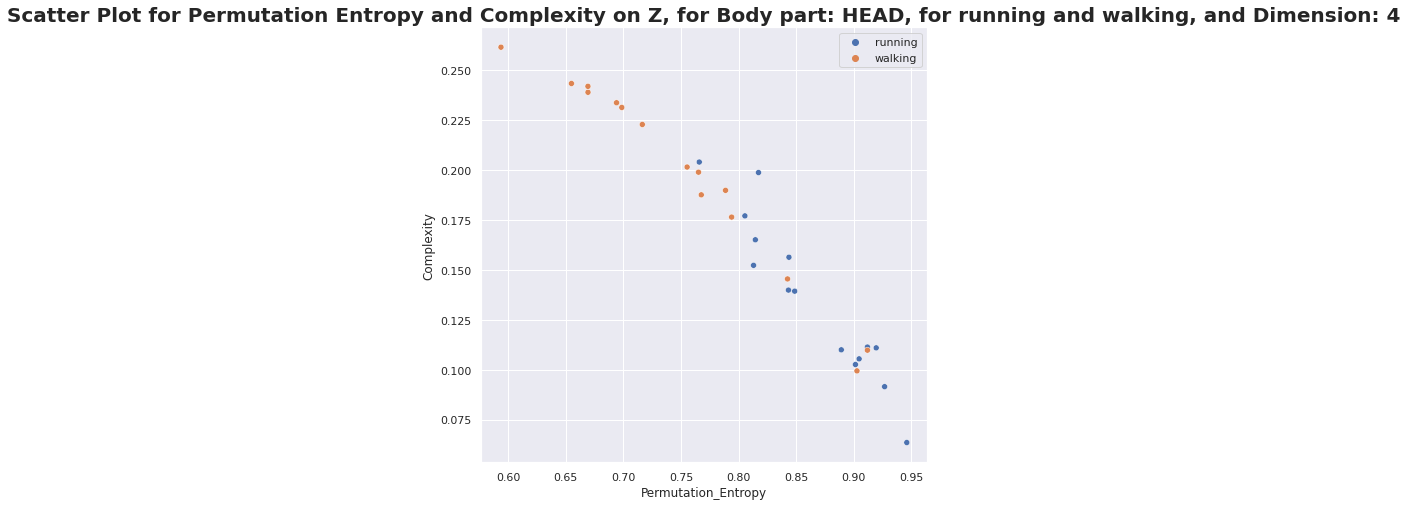

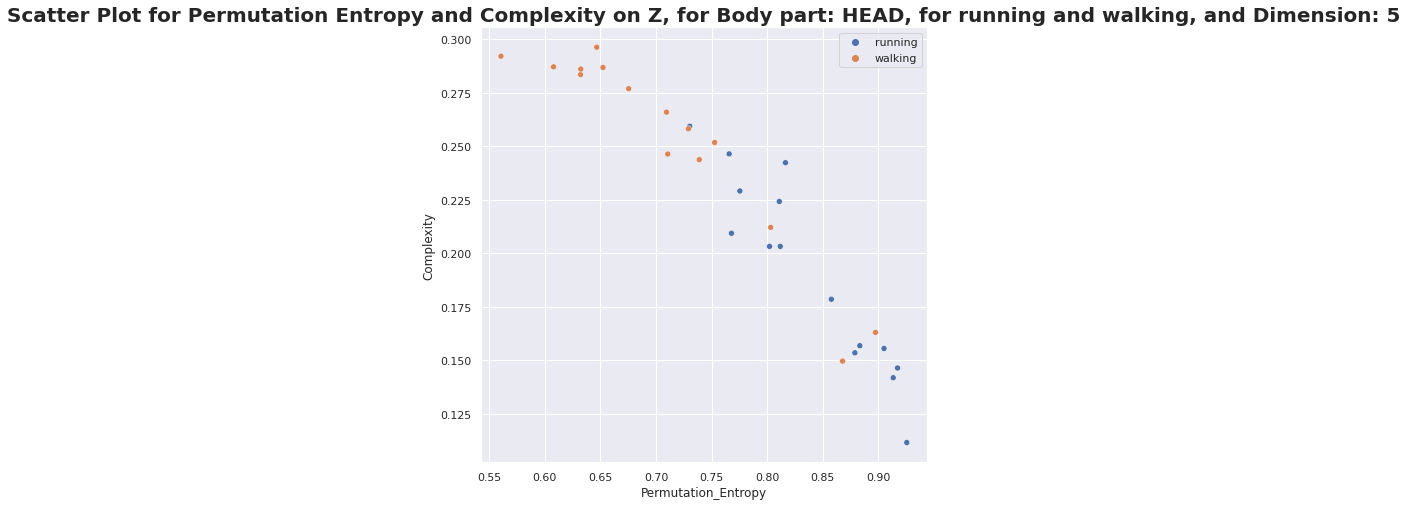

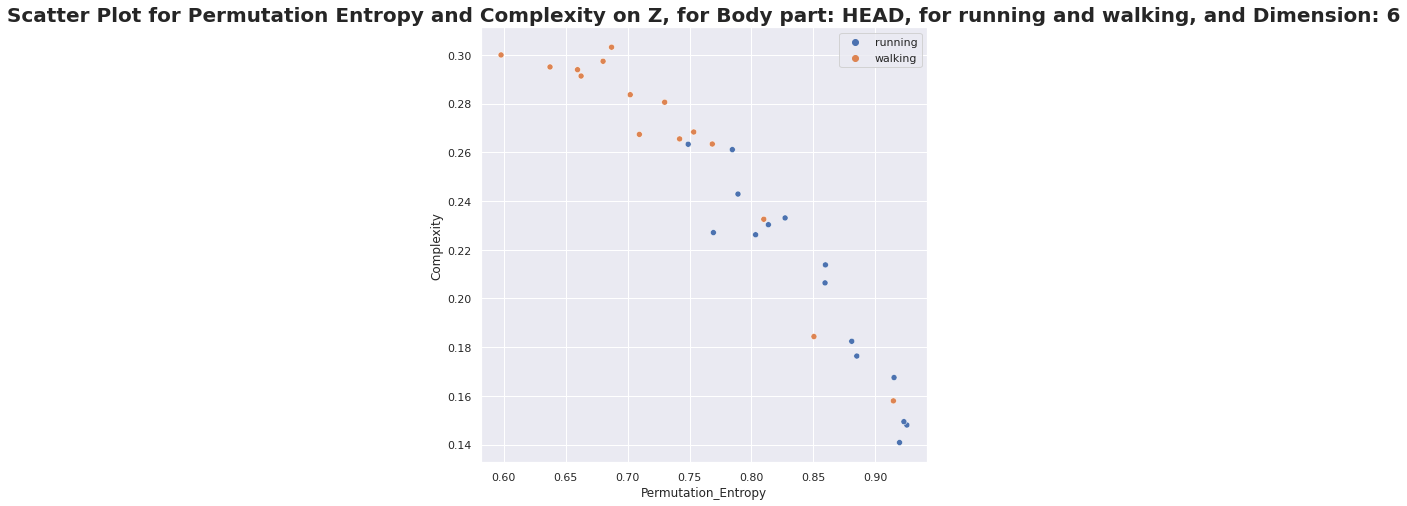

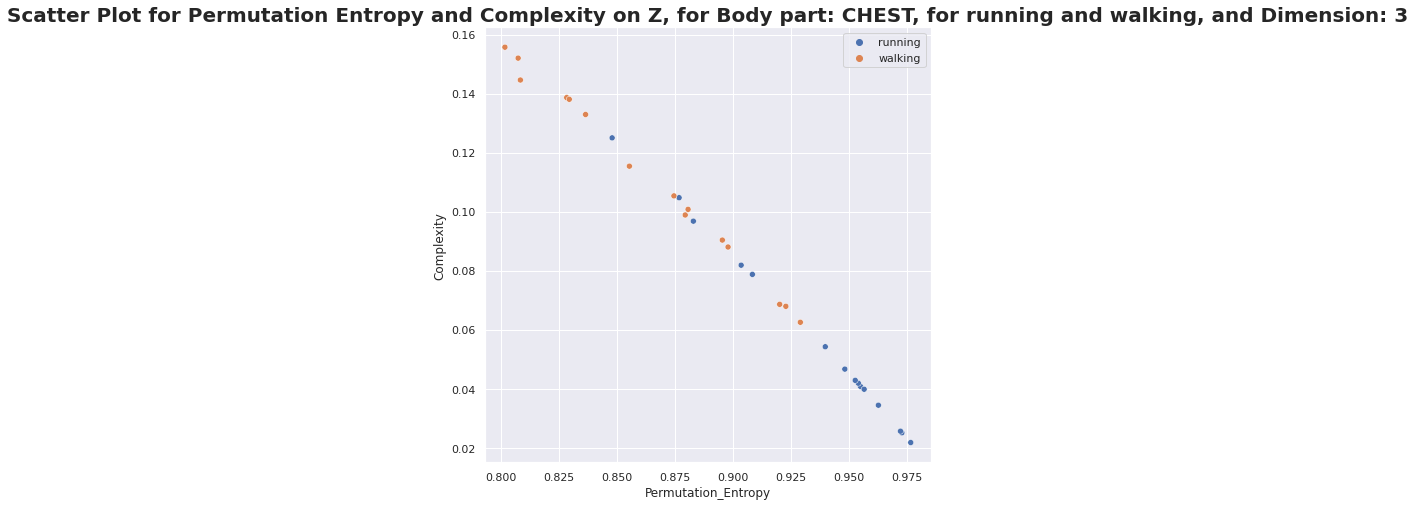

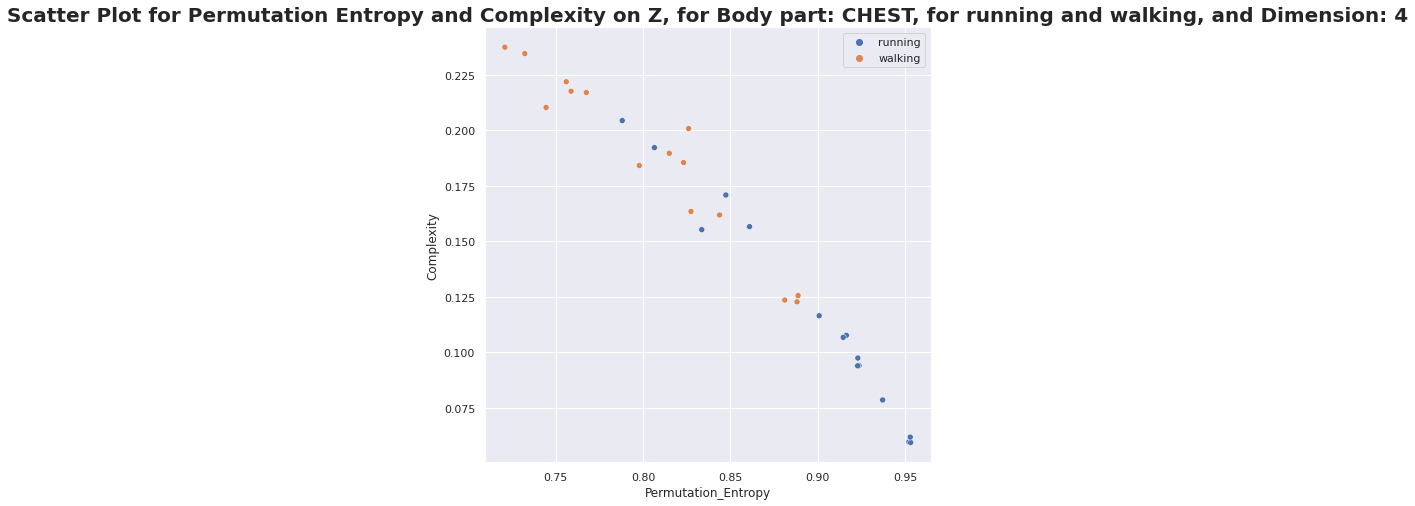

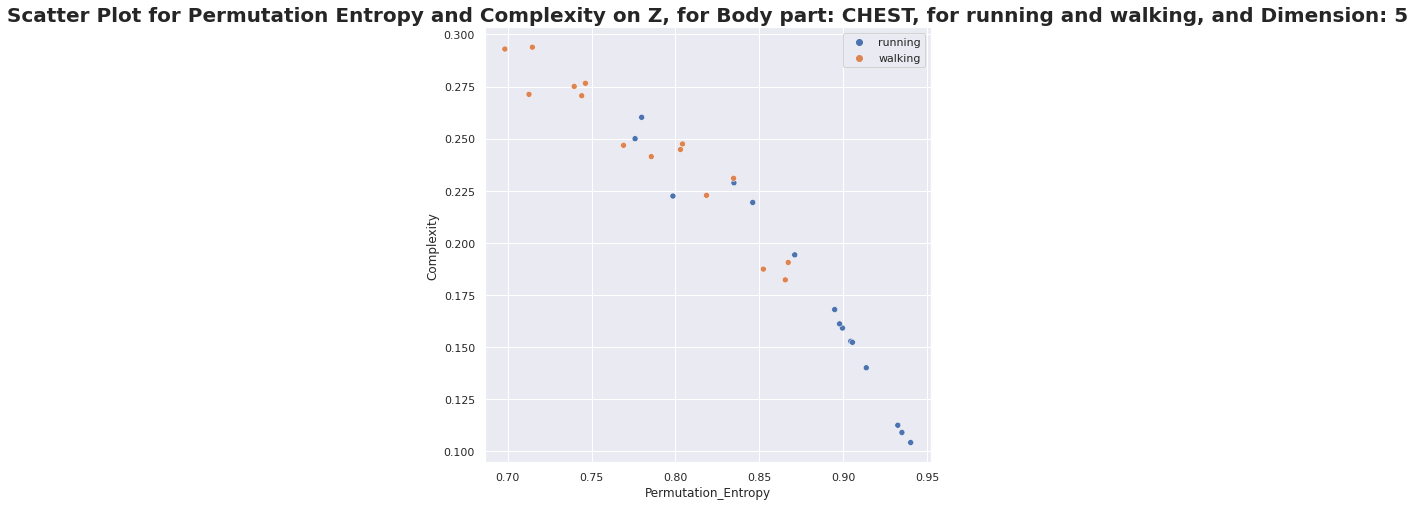

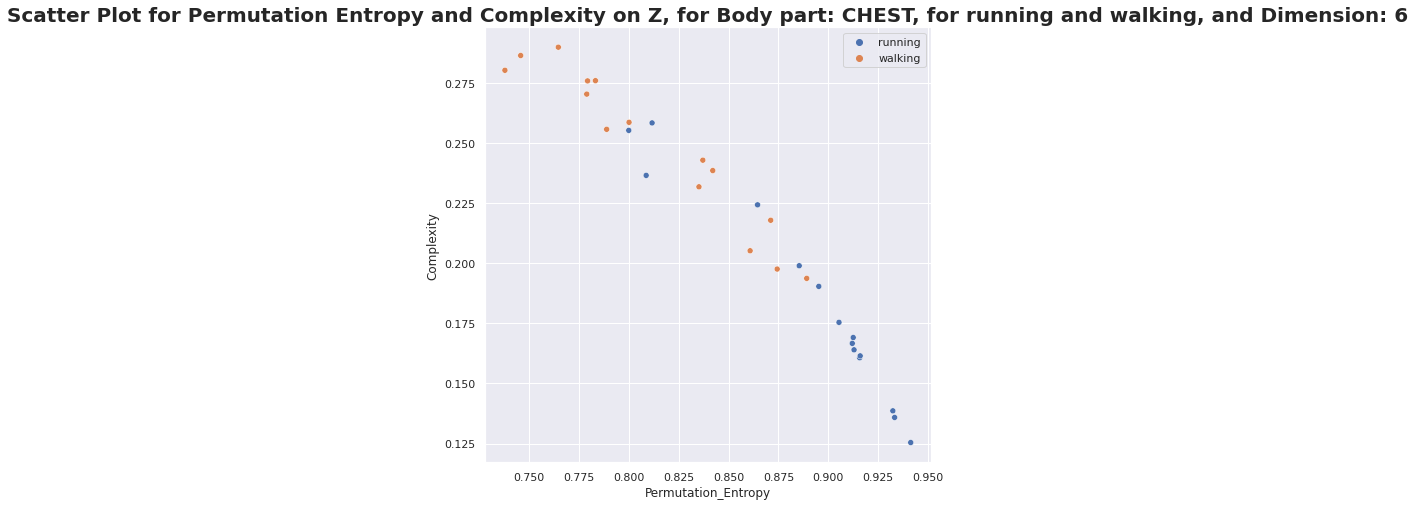

In [ ]:
sc2(df2,'running','walking') #calling the function sc2, which holds df2, and activities- running and walking

**Q4**

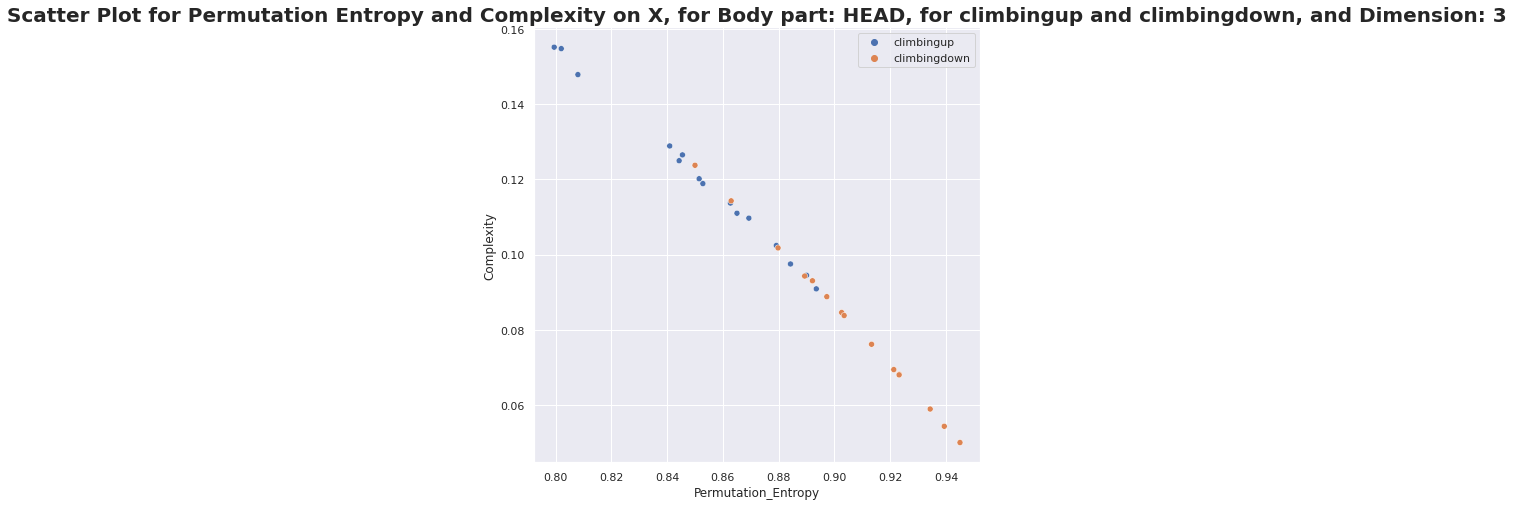

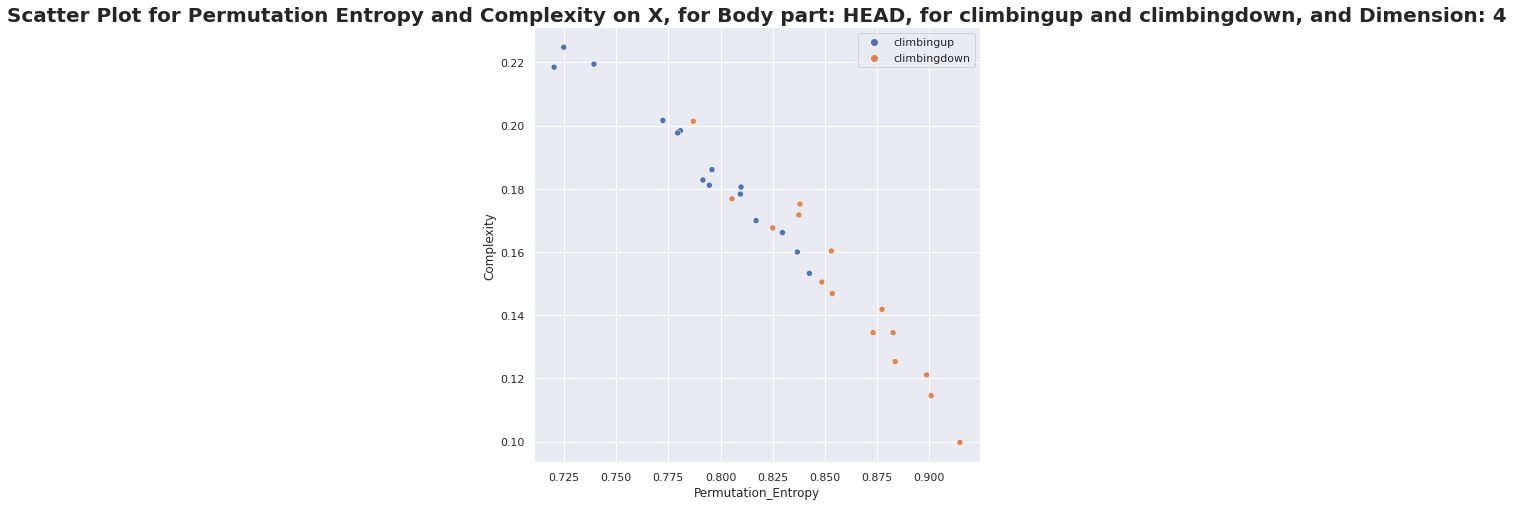

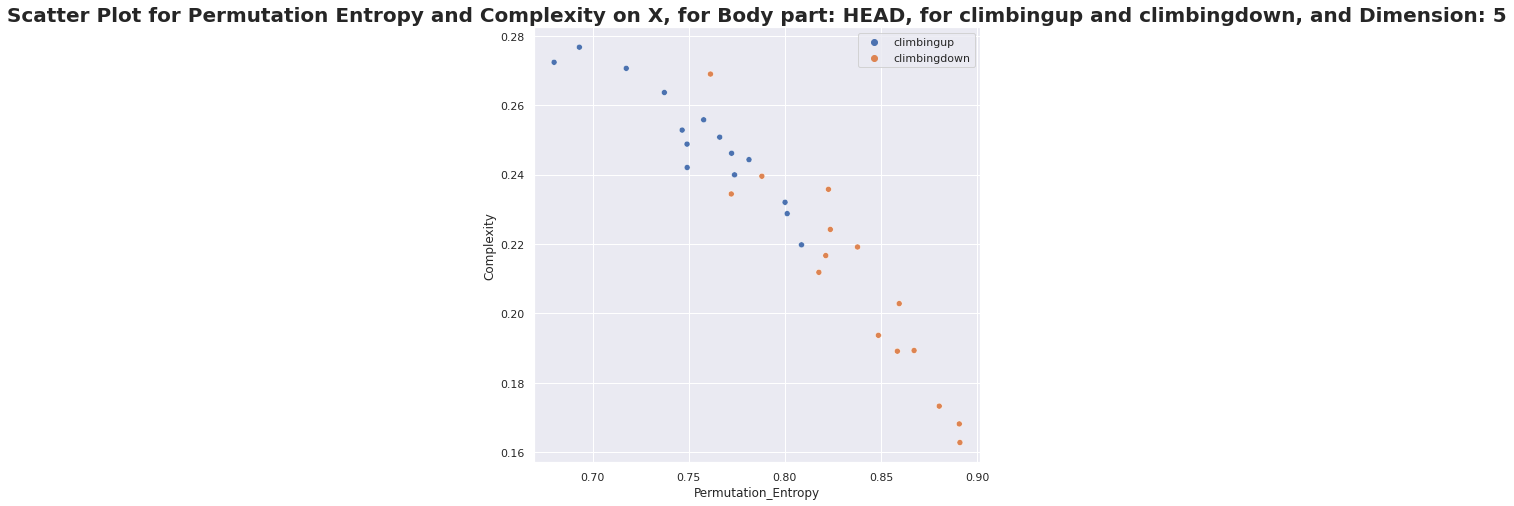

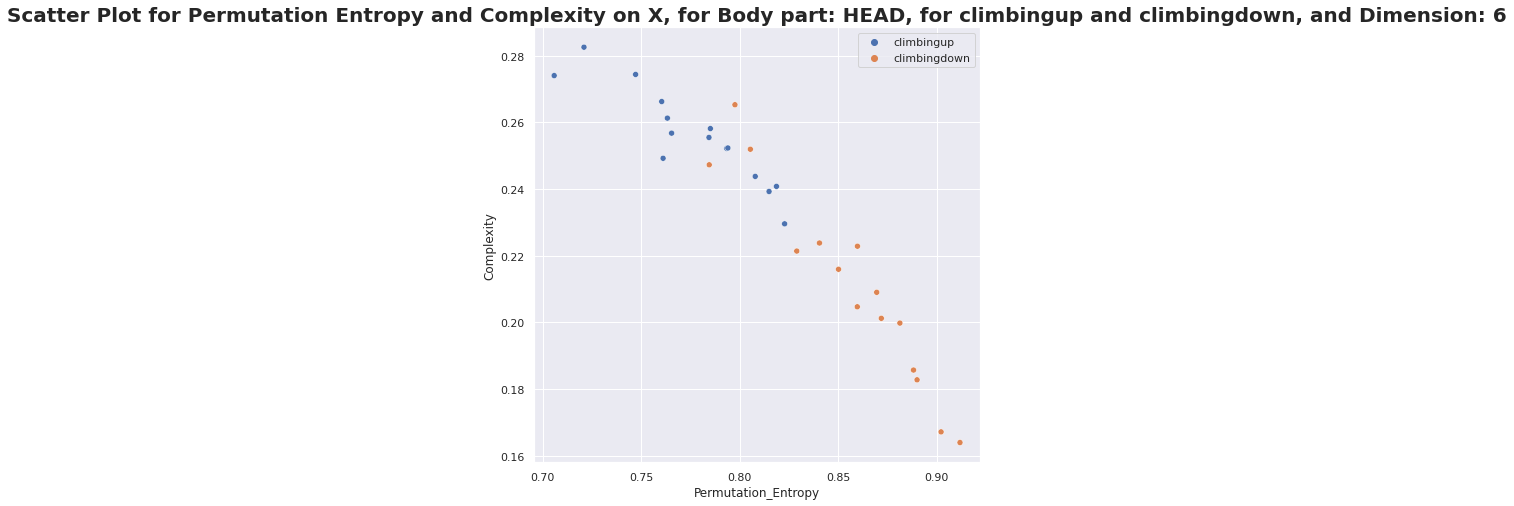

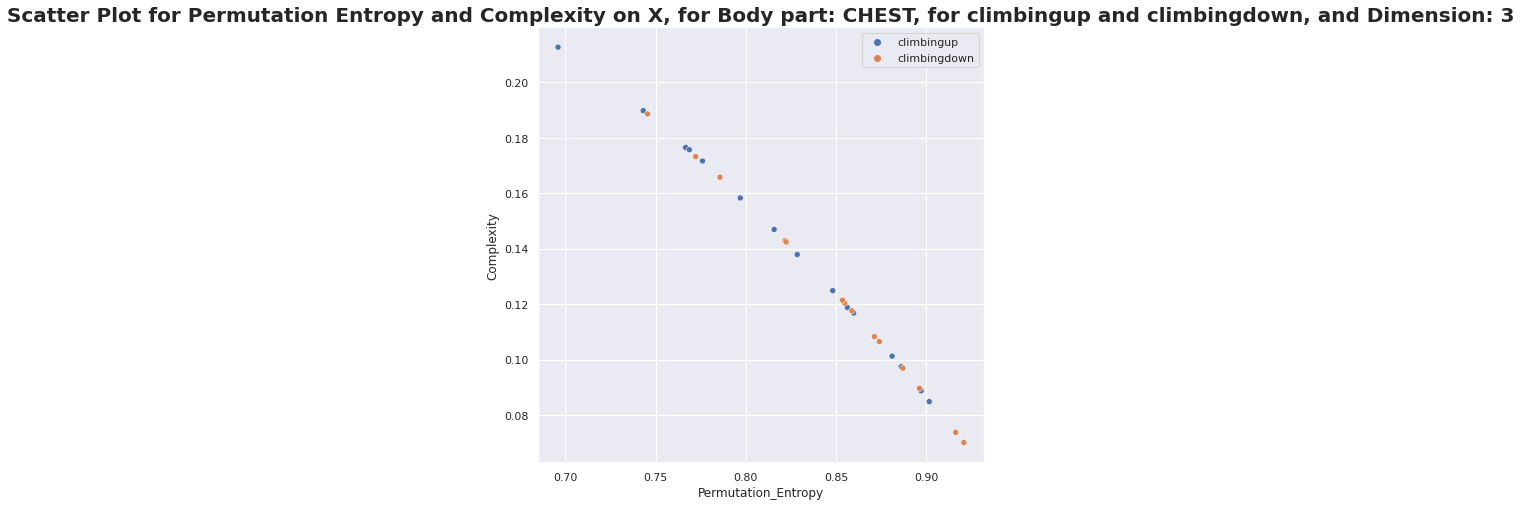

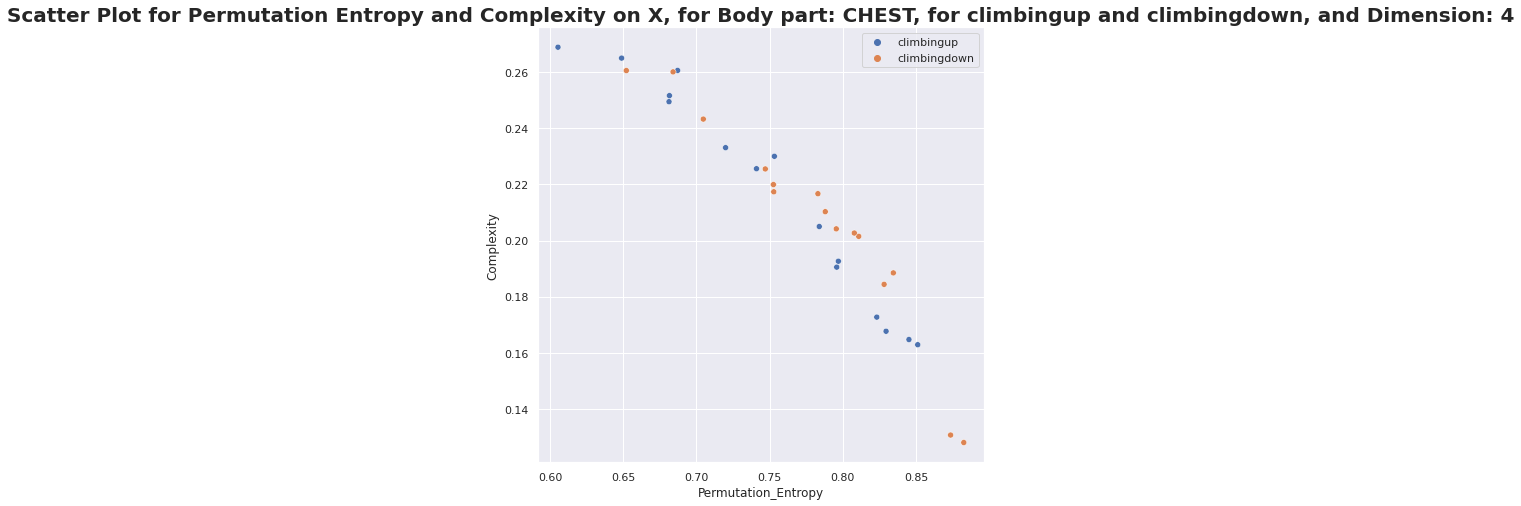

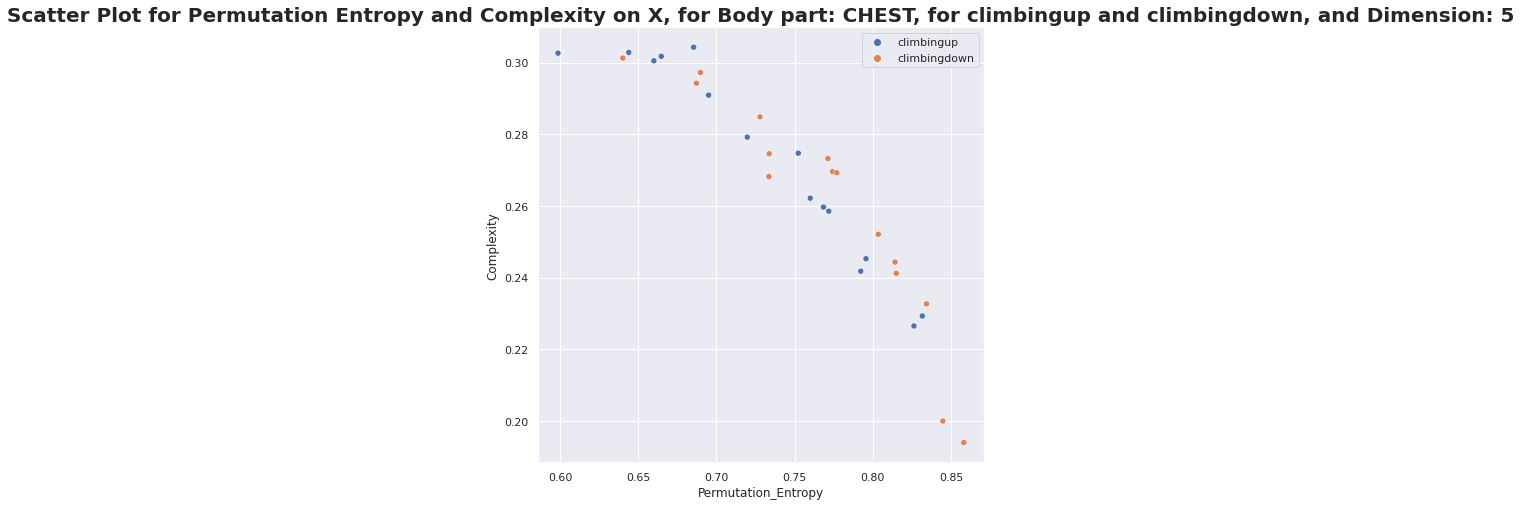

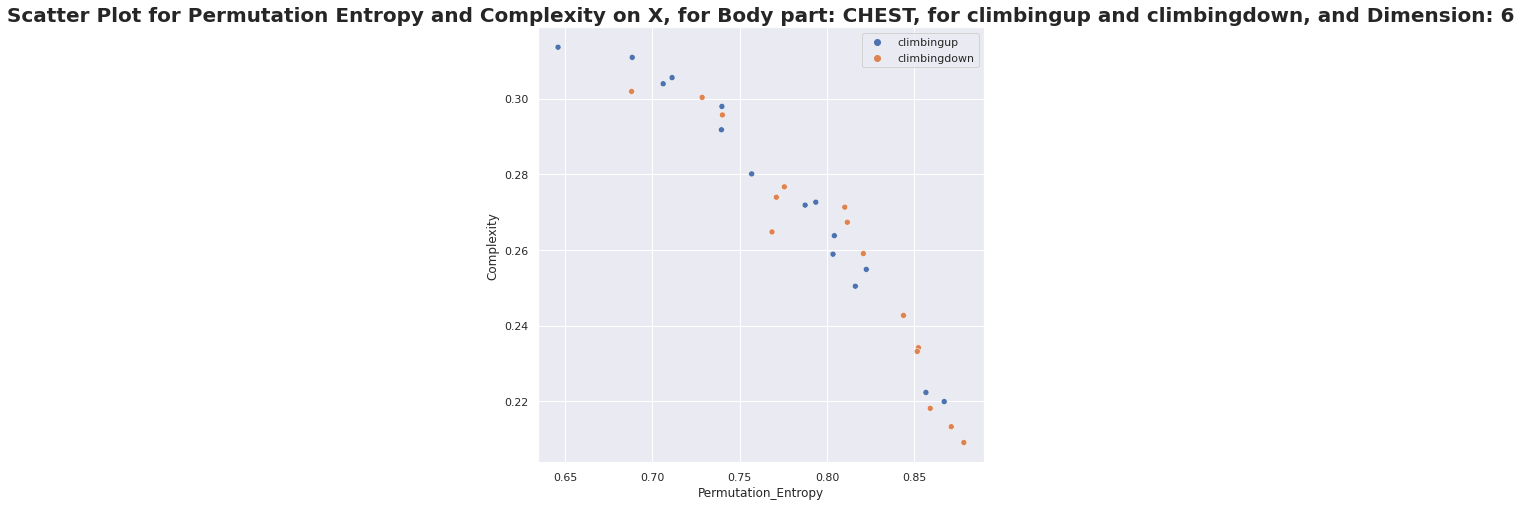

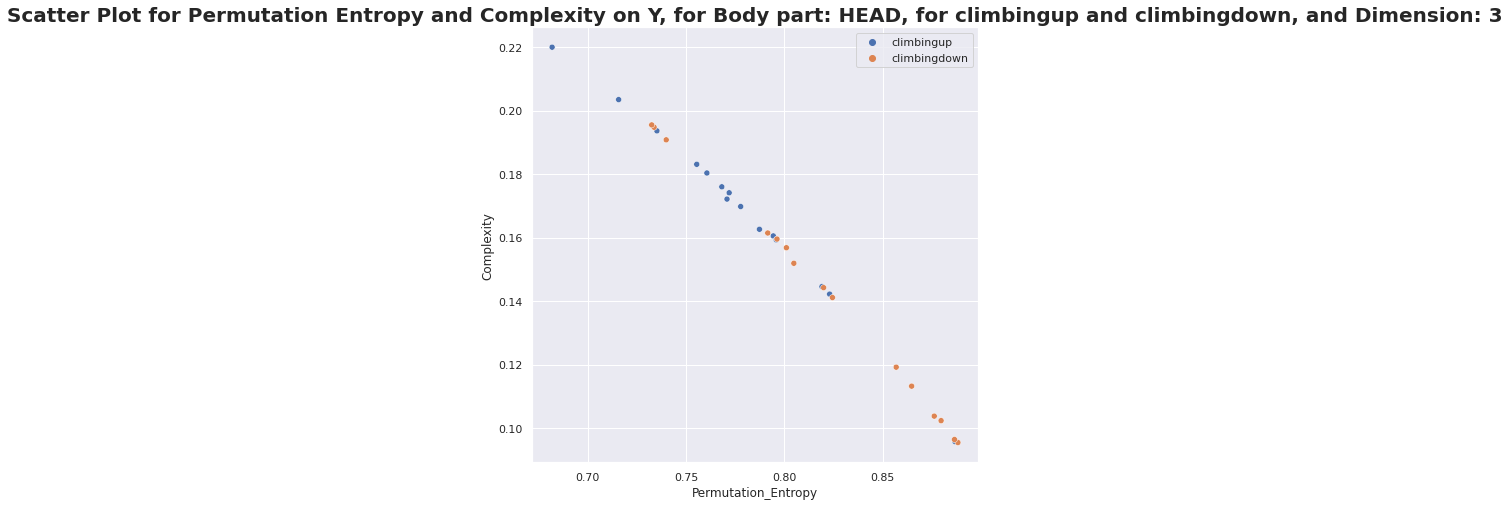

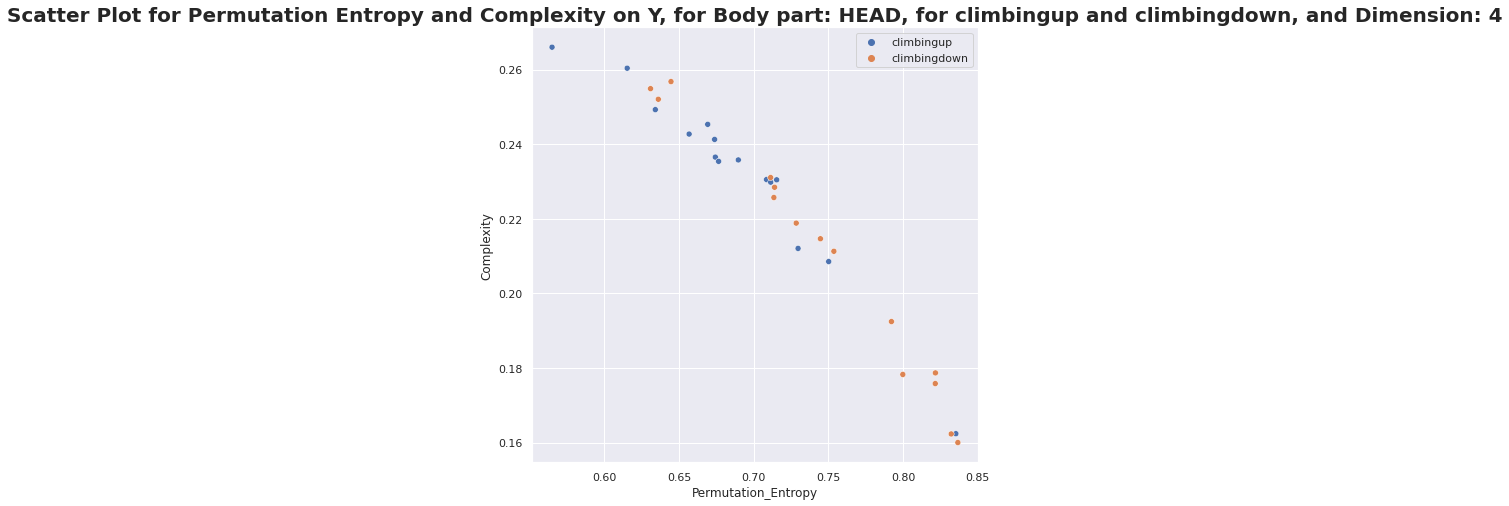

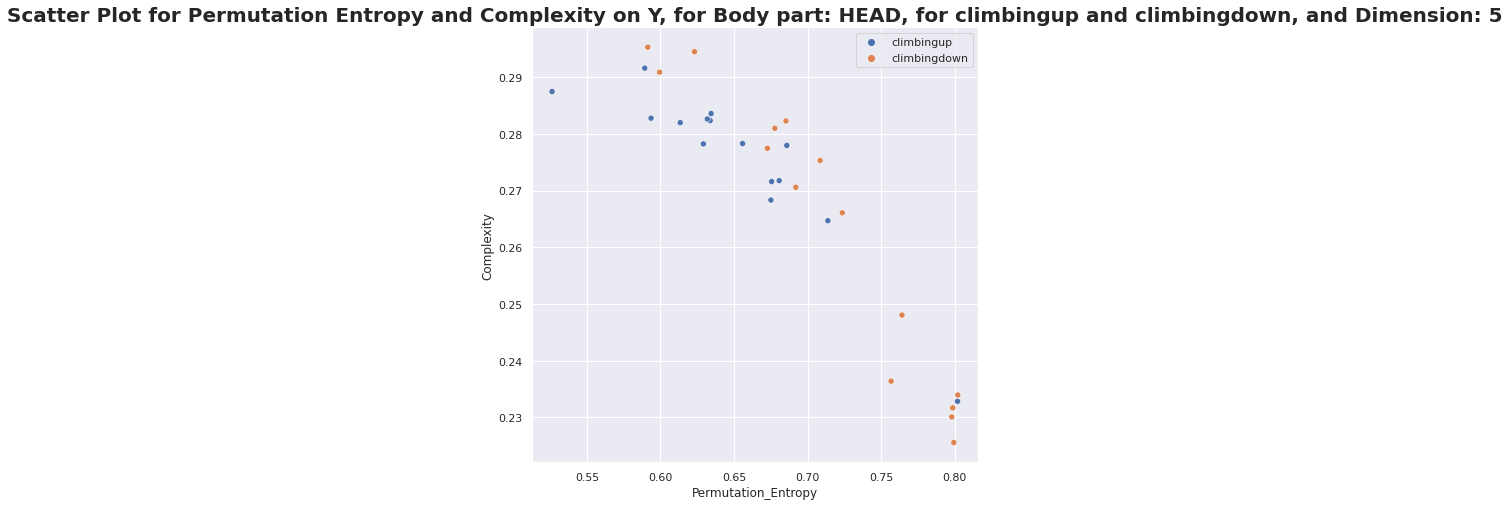

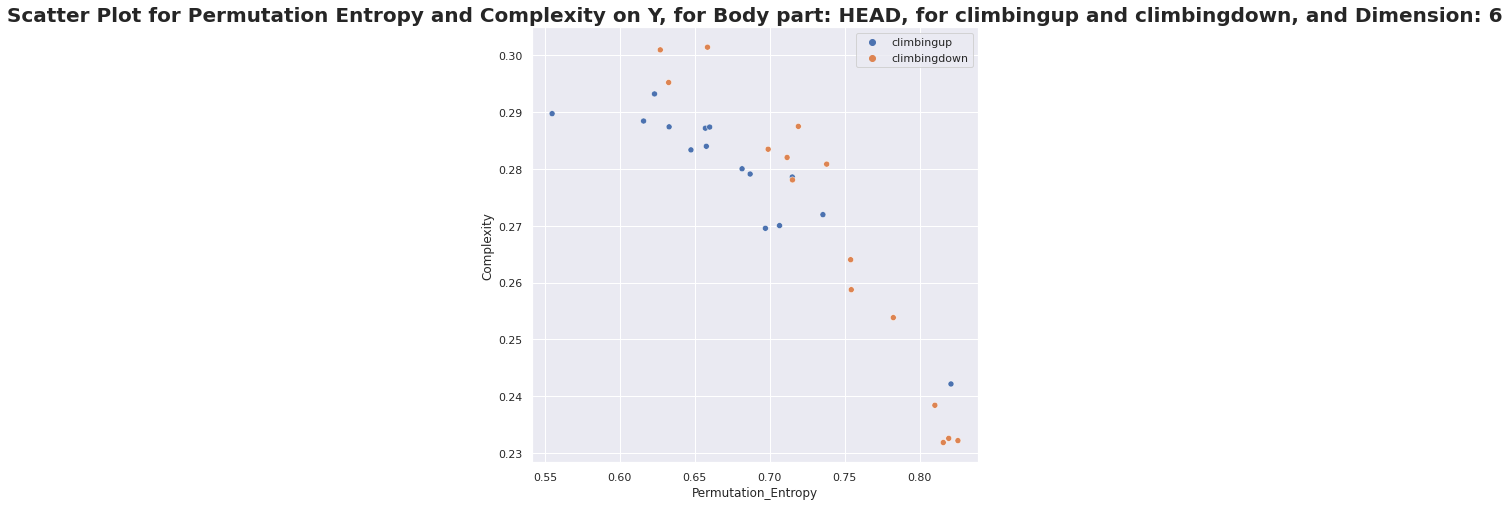

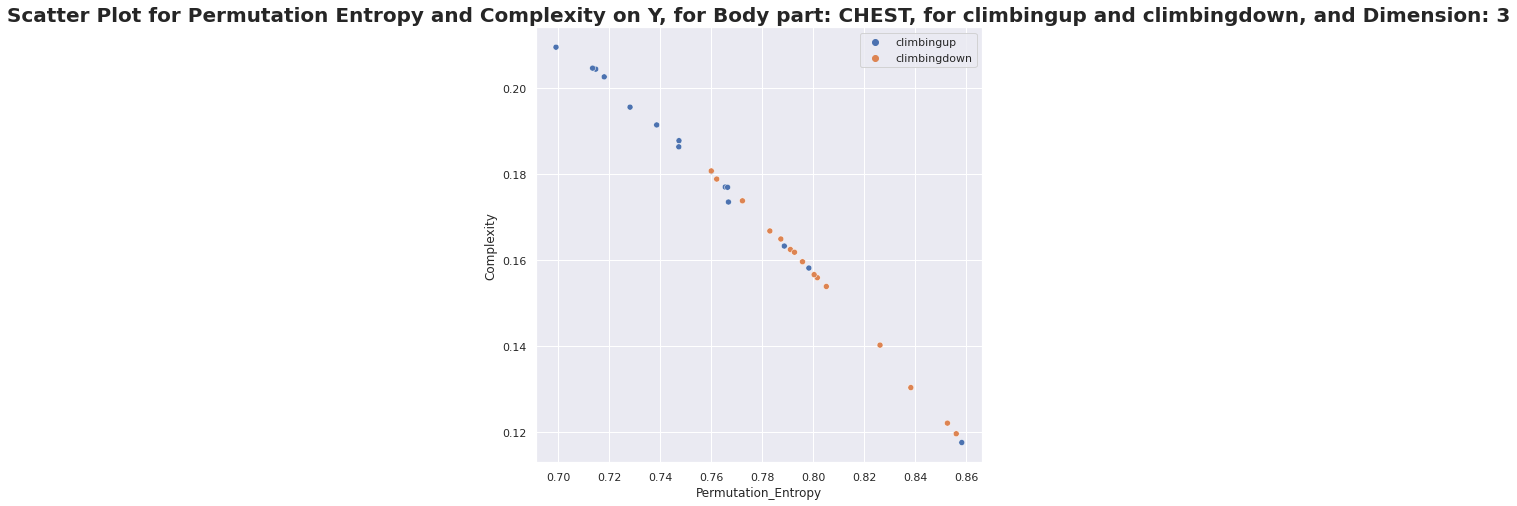

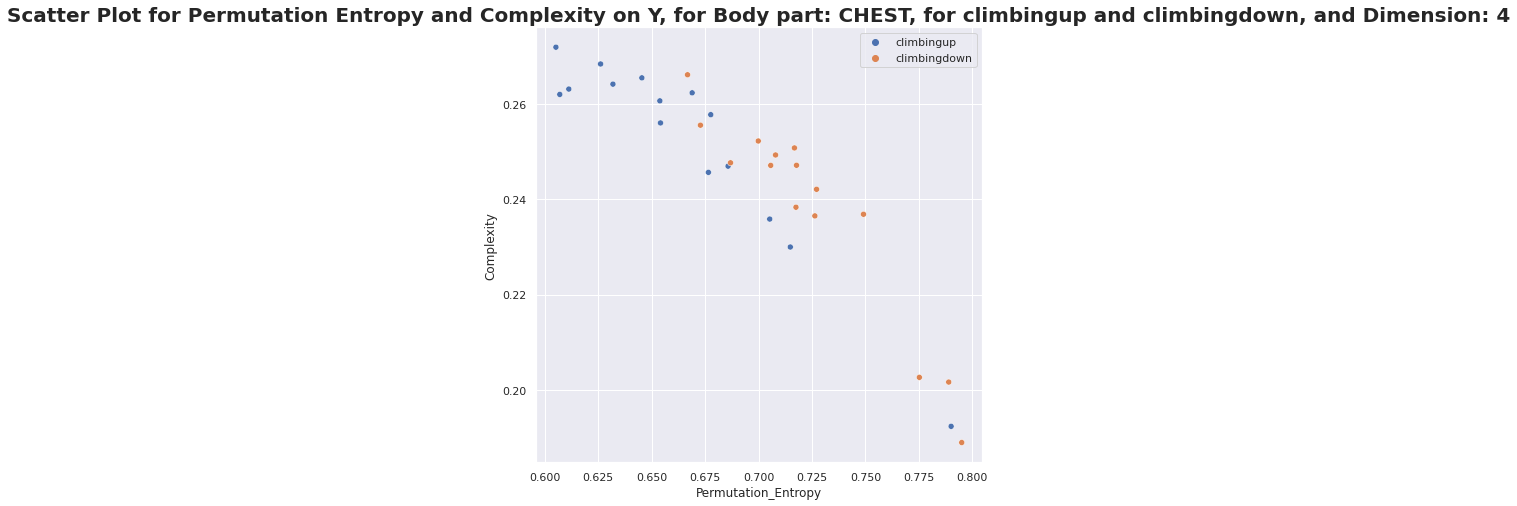

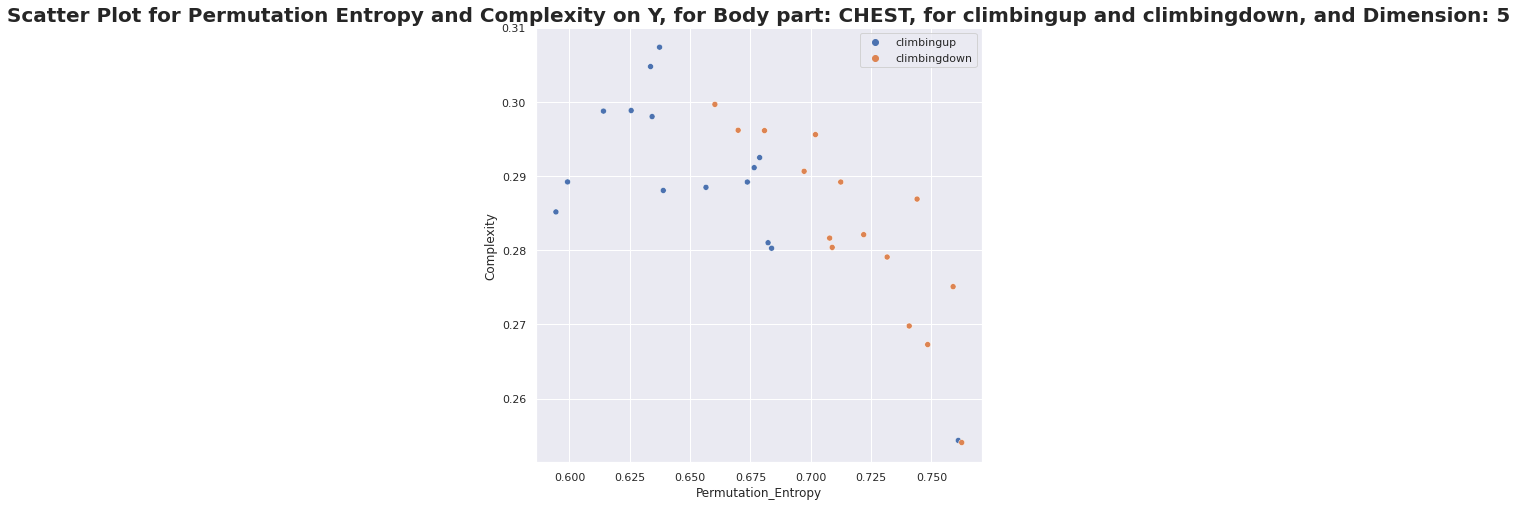

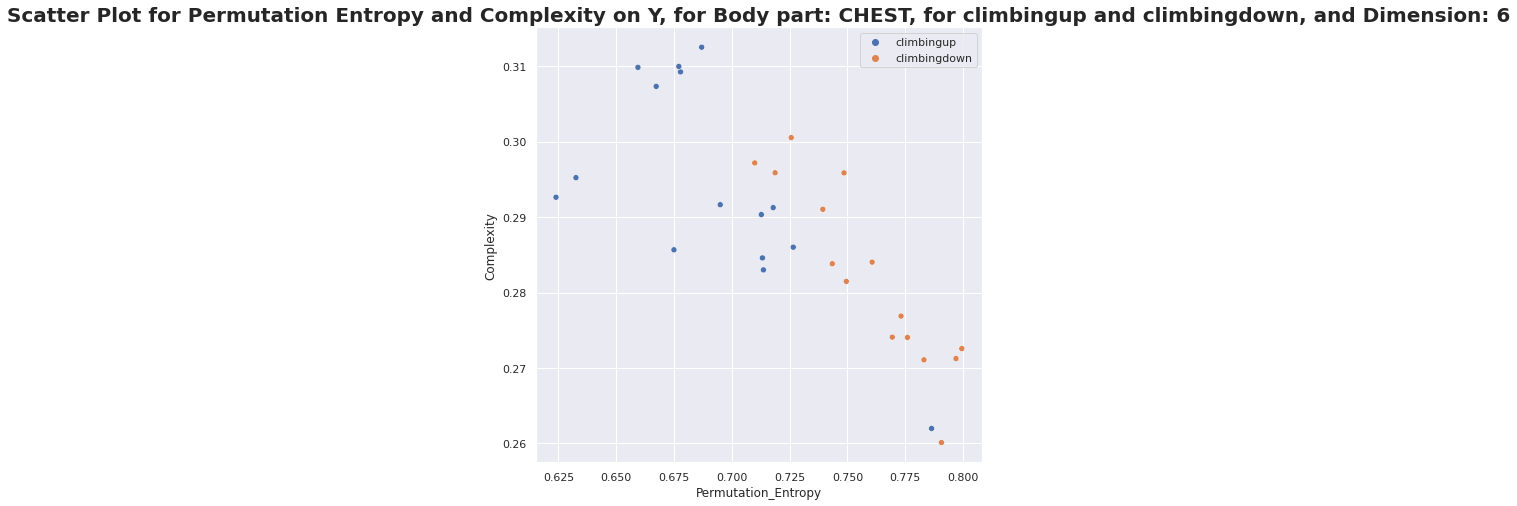

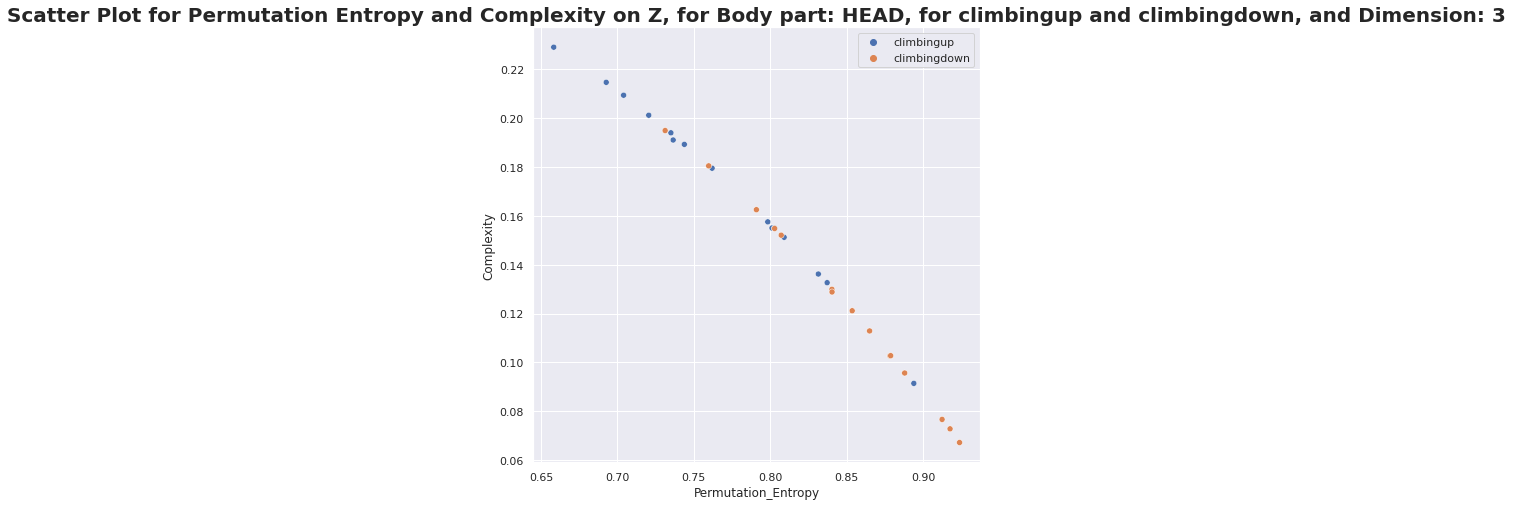

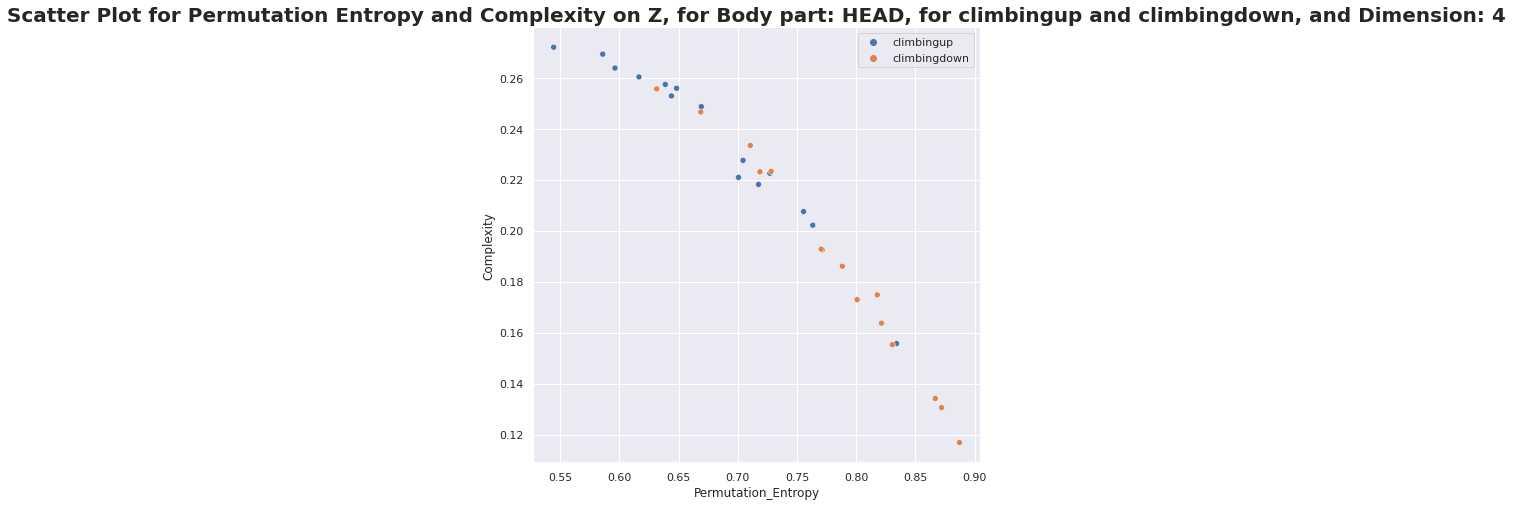

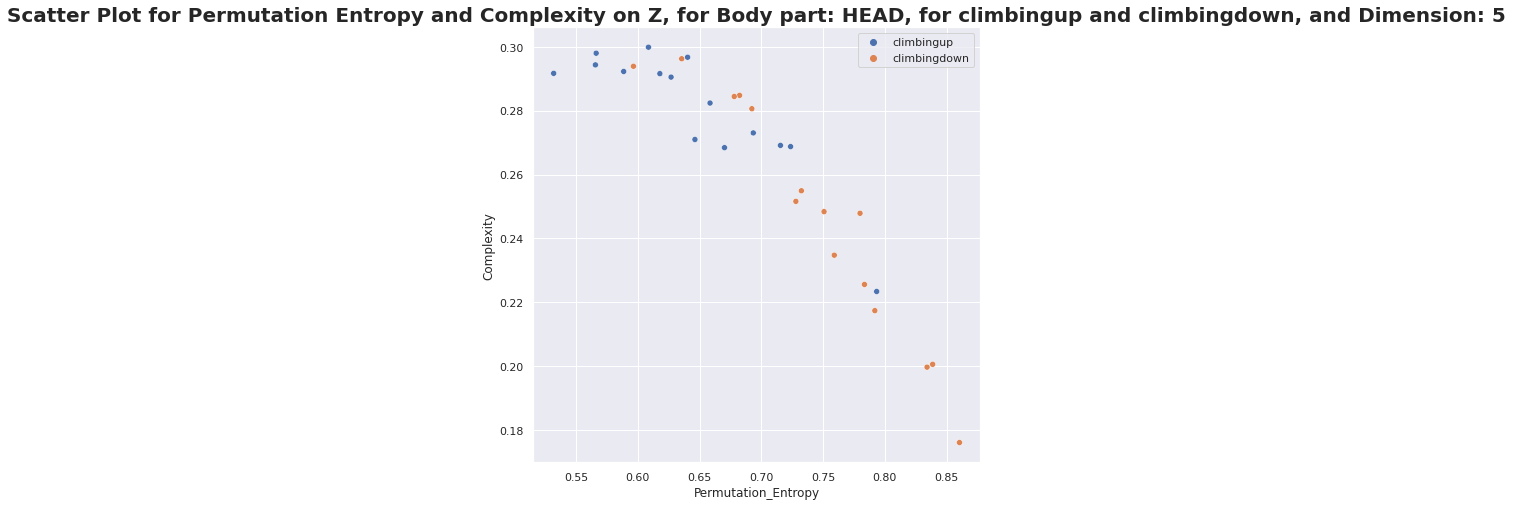

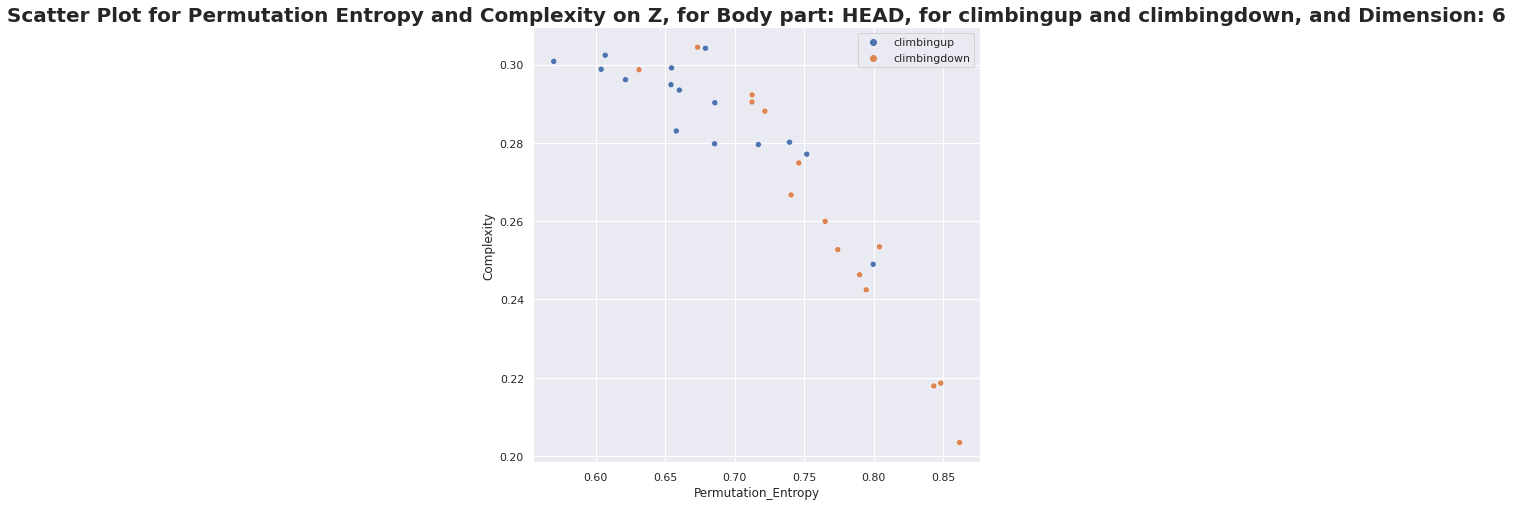

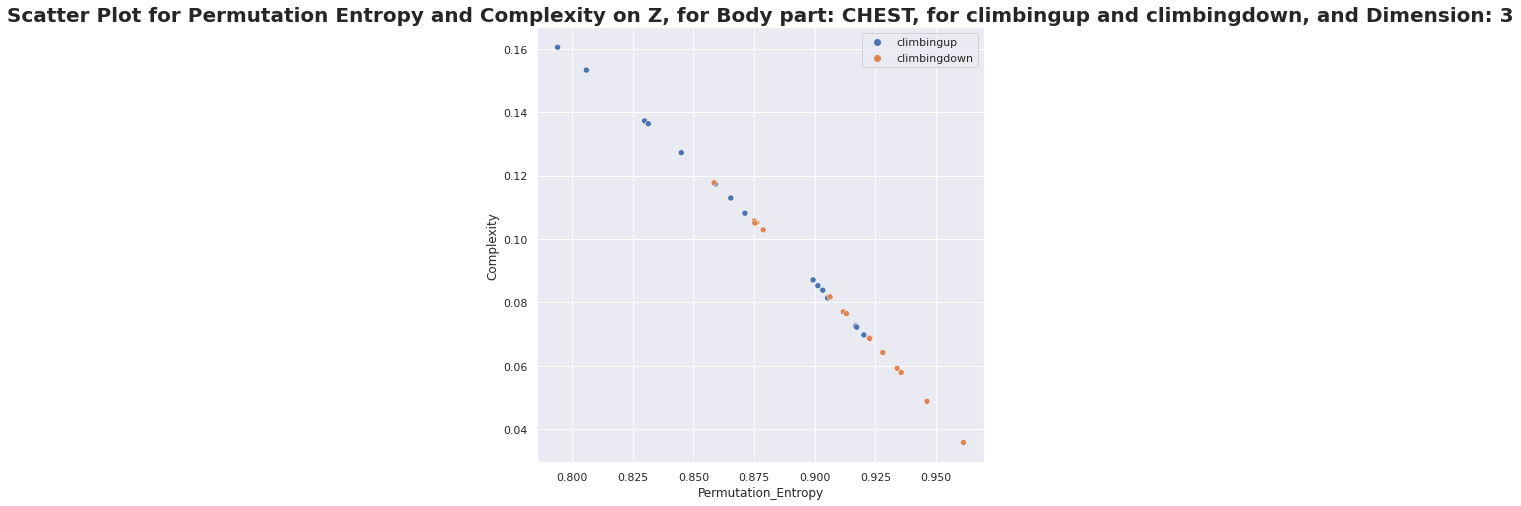

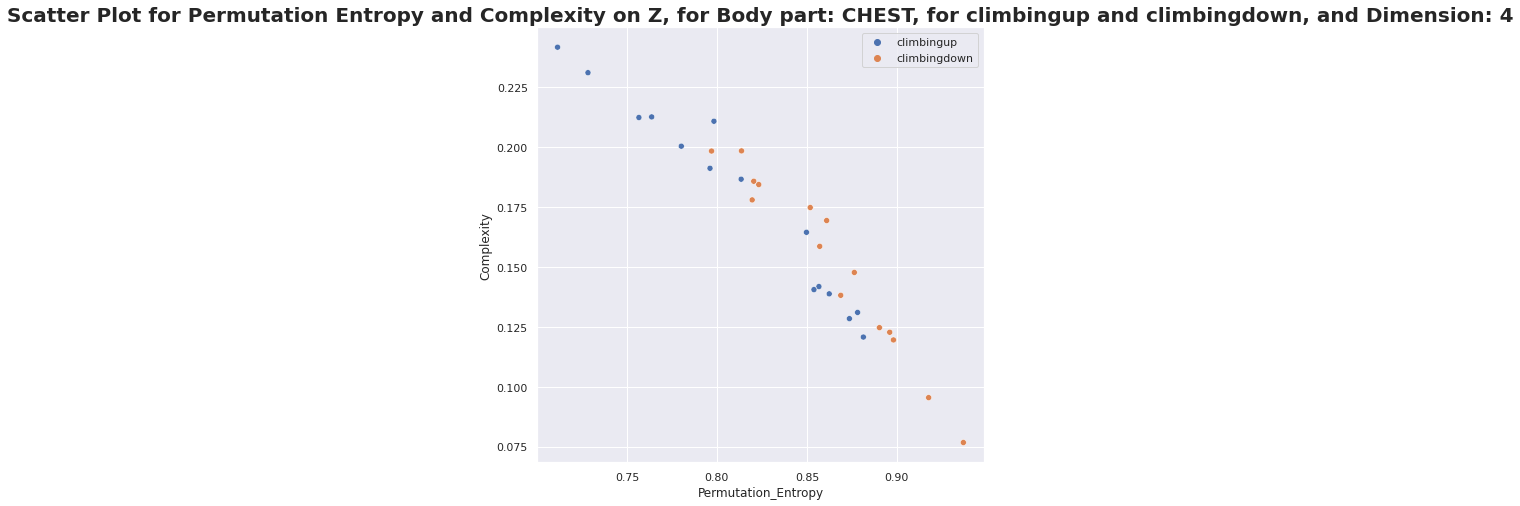

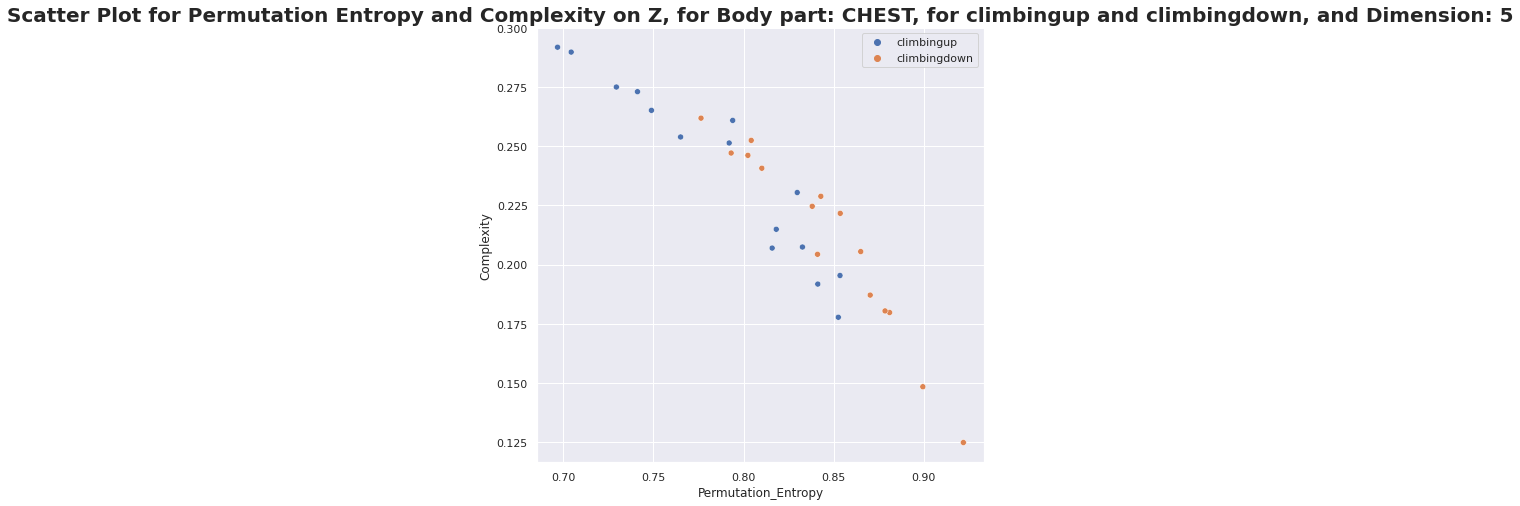

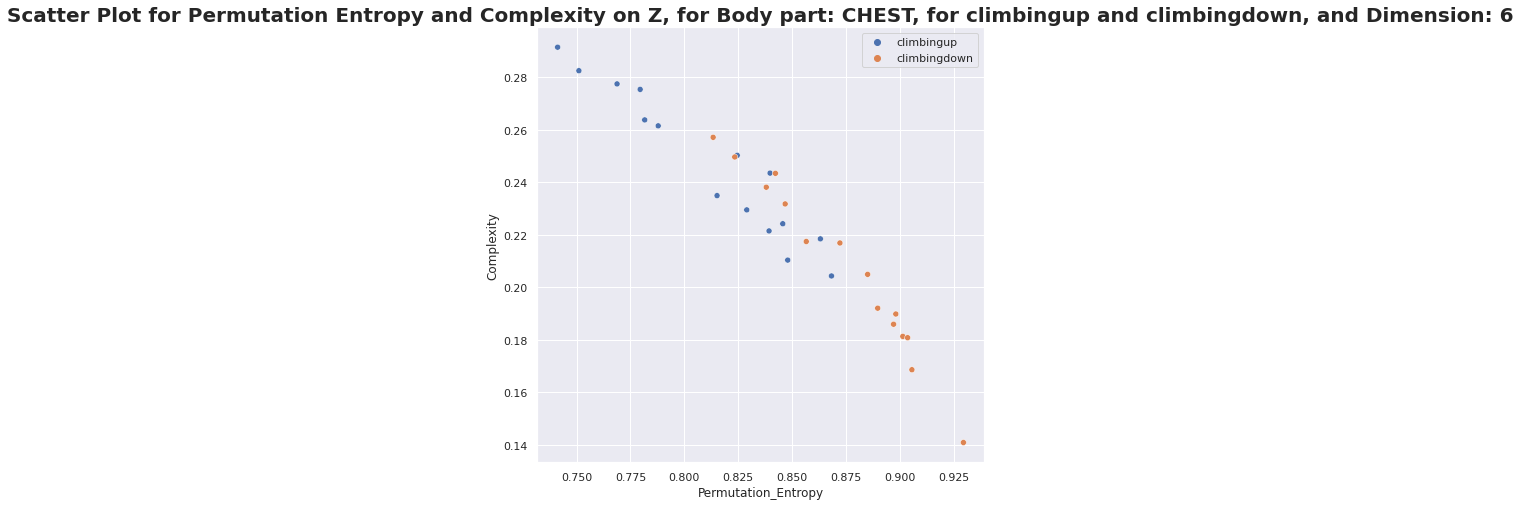

In [ ]:
sc2(df2,'climbingup','climbingdown') #calling the function sc2, which holds df2, and activities- ClimbingUp and Climbing Down